<a href="https://colab.research.google.com/github/AK2299/Show-boxx/blob/main/accident_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.
'''
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px





In [ ]:
df_IND=pd.read_csv('/content/df.csv')
df_IND.head()

Million Plus Cities   Cause category        Cause Subcategory  \
0                Agra  Traffic Control  Flashing Signal/Blinker   
1                Agra  Traffic Control  Flashing Signal/Blinker   
2                Agra  Traffic Control  Flashing Signal/Blinker   
3                Agra  Traffic Control  Flashing Signal/Blinker   
4                Agra  Traffic Control  Flashing Signal/Blinker   

         Outcome of Incident  Count  
0         Greviously Injured    0.0  
1               Minor Injury    0.0  
2             Persons Killed    0.0  
3              Total Injured    0.0  
4  Total number of Accidents    0.0

In [ ]:
#BASIC EDA(EXLPORATORY DATA ANALYSIS)

df_IND.columns

Index(['Million Plus Cities', 'Cause category', 'Cause Subcategory',
       'Outcome of Incident', 'Count'],
      dtype='object')

In [ ]:
df_IND.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9550 non-null   object 
 1   Cause category       9550 non-null   object 
 2   Cause Subcategory    9550 non-null   object 
 3   Outcome of Incident  9550 non-null   object 
 4   Count                9547 non-null   float64
dtypes: float64(1), object(4)
memory usage: 373.2+ KB


In [ ]:
df_IND.describe()

Count
count  9547.000000
mean    103.627632
std     275.189303
min       0.000000
25%       0.000000
50%      12.000000
75%      70.500000
max    3148.000000

In [ ]:
df_IND.isnull().sum()

Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  3
dtype: int64

In [ ]:
#finding null values
df_IND[df_IND['Count'].isnull()]


Million Plus Cities            Cause category Cause Subcategory  \
7056             Gwalior  Impacting Vehicle/Object         Other Non   
7057             Gwalior  Impacting Vehicle/Object         Other Non   
7058             Gwalior  Impacting Vehicle/Object         Other Non   

     Outcome of Incident  Count  
7056  Greviously Injured    NaN  
7057      Persons Killed    NaN  
7058        Minor Injury    NaN

In [ ]:
df_IND.dtypes

Million Plus Cities     object
Cause category          object
Cause Subcategory       object
Outcome of Incident     object
Count                  float64
dtype: object

In [ ]:
df_IND.shape

(9550, 5)

In [ ]:
#segregate colomns as per categories
category_columns=df_IND.select_dtypes(include=['object']).columns

category_columns

Index(['Million Plus Cities', 'Cause category', 'Cause Subcategory',
       'Outcome of Incident'],
      dtype='object')

In [ ]:
#segregate columns as per neumerical values
neumeric_columns=df_IND.select_dtypes(include=['int64','float64']).columns

neumeric_columns
dtypes=(neumeric_columns,category_columns)

dtypes

(Index(['Count'], dtype='object'),
 Index(['Million Plus Cities', 'Cause category', 'Cause Subcategory',
        'Outcome of Incident'],
       dtype='object'))

In [ ]:
#number of unique values and percentage of unique values in categorial columns

for i in category_columns:
    print(f'{i}: {df_IND[i].nunique()}')
    print(df_IND[i].value_counts()/len(df_IND[i])*100)
    print('')

Million Plus Cities: 50
Million Plus Cities
Agra                    2.0
Patna                   2.0
Kollam                  2.0
Kota                    2.0
Lucknow                 2.0
Ludhiana                2.0
Madurai                 2.0
Mallapuram              2.0
Meerut                  2.0
Mumbai                  2.0
Nagpur                  2.0
Nashik                  2.0
Pune                    2.0
Ahmedabad               2.0
Raipur                  2.0
Rajkot                  2.0
Srinagar                2.0
Surat                   2.0
Thiruvanthapuram        2.0
Thrissur                2.0
Tiruchirapalli          2.0
Vadodra                 2.0
Varanasi                2.0
Vijaywada city          2.0
Kolkata                 2.0
Kochi                   2.0
Khozikode               2.0
Kanpur                  2.0
Allahabad(Prayagraj)    2.0
Amritsar                2.0
Asansol Durgapur        2.0
Aurangabad              2.0
Bengaluru               2.0
Bhopal                  2.0
Chan

In [ ]:
#missing values

df_IND[(df_IND['Million Plus Cities']=='Gwalior') & (df_IND['Cause category']=='Impacting Vehicle/Object') &
(df_IND['Cause Subcategory']=='Other Non')]

Million Plus Cities            Cause category Cause Subcategory  \
7056             Gwalior  Impacting Vehicle/Object         Other Non   
7057             Gwalior  Impacting Vehicle/Object         Other Non   
7058             Gwalior  Impacting Vehicle/Object         Other Non   
7059             Gwalior  Impacting Vehicle/Object         Other Non   

            Outcome of Incident  Count  
7056         Greviously Injured    NaN  
7057             Persons Killed    NaN  
7058               Minor Injury    NaN  
7059  Total number of Accidents    0.0

In [ ]:
#in same millon plus cities ,category and sub category we can count the value 0
#so we assume null values as 0

df_IND.fillna(0,inplace=True)
df_IND[(df_IND['Million Plus Cities']=='Gwalior') & (df_IND['Cause category']=='Impacting Vehicle/Object') &
(df_IND['Cause Subcategory']=='Other Non')]

Million Plus Cities            Cause category Cause Subcategory  \
7056             Gwalior  Impacting Vehicle/Object         Other Non   
7057             Gwalior  Impacting Vehicle/Object         Other Non   
7058             Gwalior  Impacting Vehicle/Object         Other Non   
7059             Gwalior  Impacting Vehicle/Object         Other Non   

            Outcome of Incident  Count  
7056         Greviously Injured    0.0  
7057             Persons Killed    0.0  
7058               Minor Injury    0.0  
7059  Total number of Accidents    0.0

<ipython-input-15-8bafca2b3d4b>:8: UserWarning: The palette list has more values (50) than needed (1), which may not be intended.
  sns.countplot(data=df_IND,x=columns,palette=palette,hue=Any)


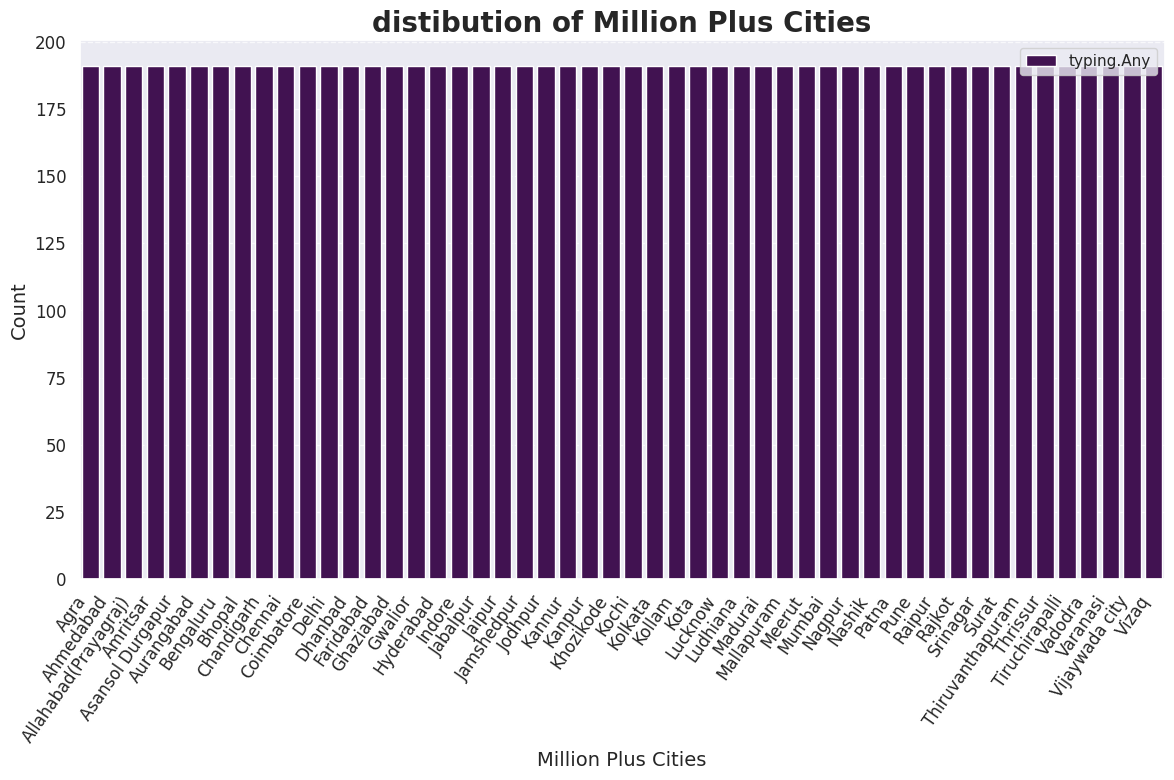

<ipython-input-15-8bafca2b3d4b>:8: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.countplot(data=df_IND,x=columns,palette=palette,hue=Any)


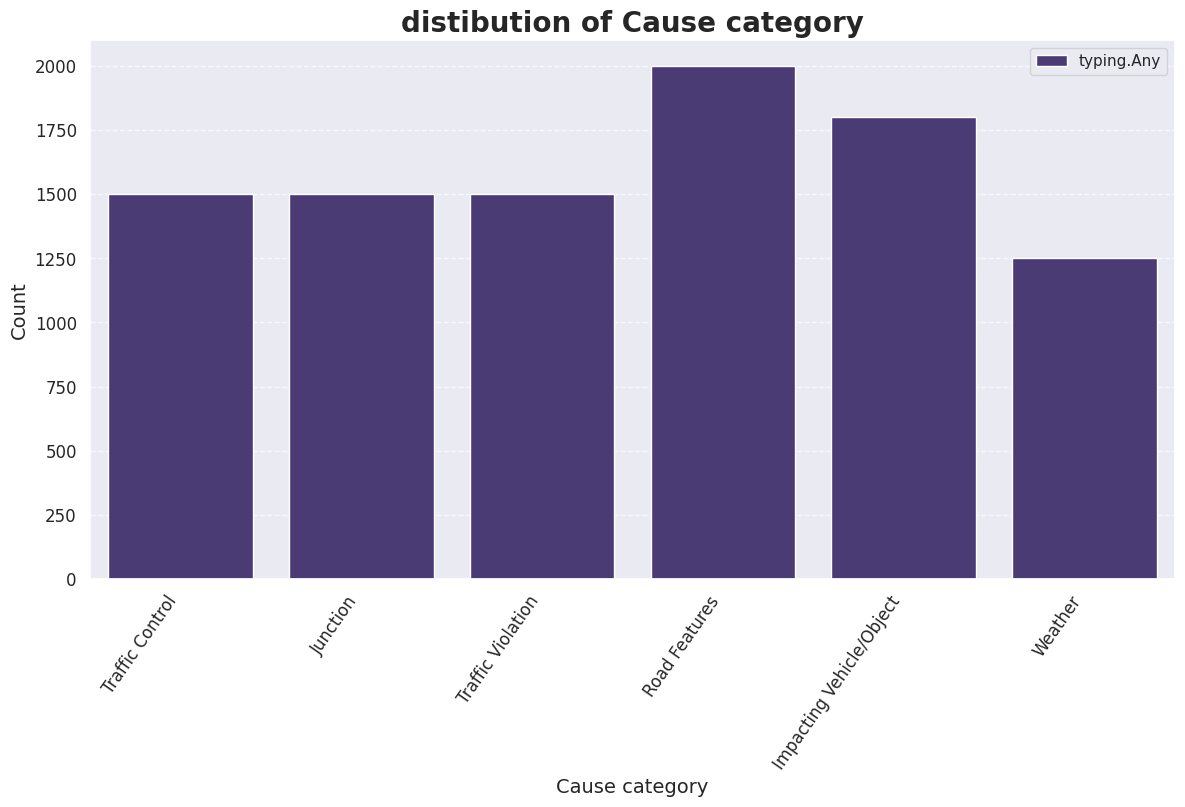

<ipython-input-15-8bafca2b3d4b>:8: UserWarning: The palette list has more values (35) than needed (1), which may not be intended.
  sns.countplot(data=df_IND,x=columns,palette=palette,hue=Any)


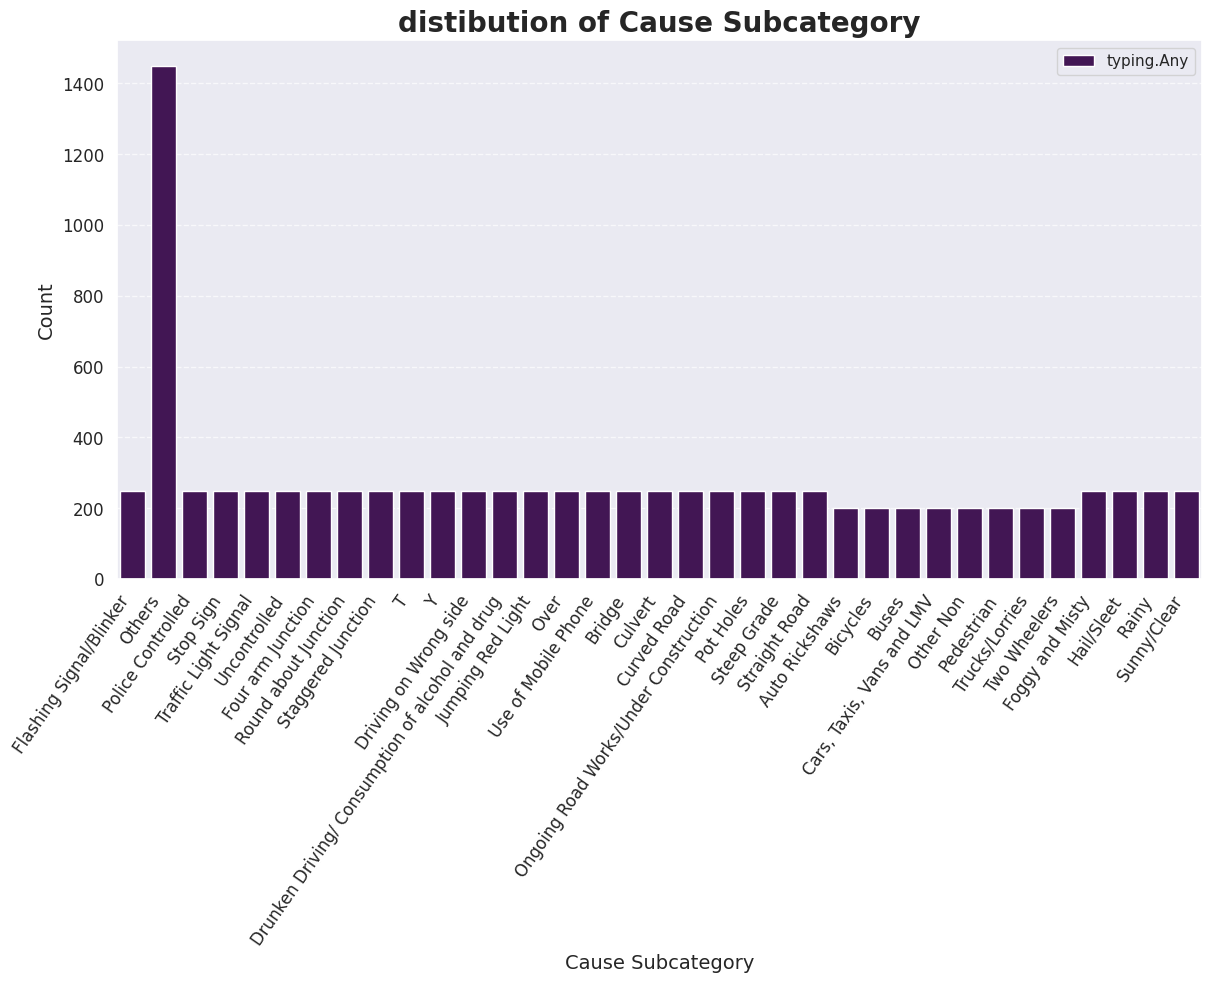

<ipython-input-15-8bafca2b3d4b>:8: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  sns.countplot(data=df_IND,x=columns,palette=palette,hue=Any)


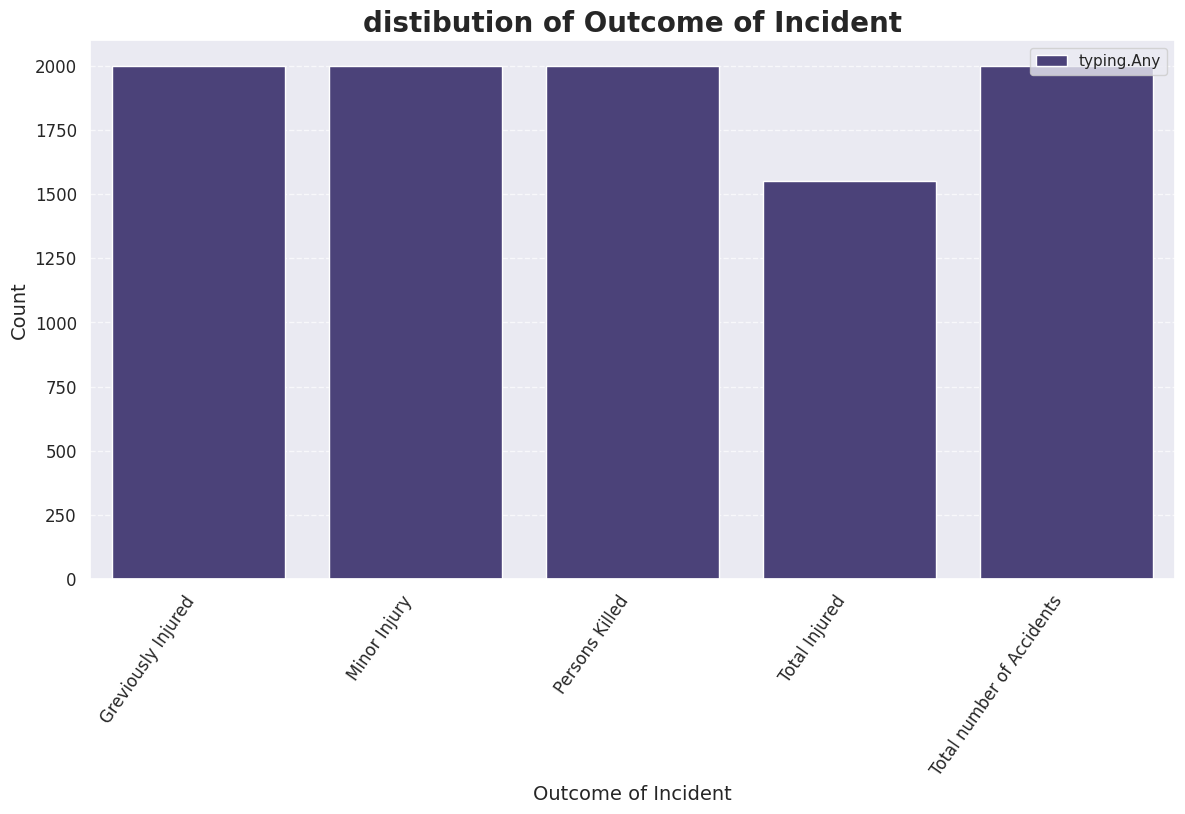

In [ ]:
#Data Analysis and Visualization
from typing import Any
sns.set_theme(style="darkgrid")
for columns in category_columns:
  unique_values=df_IND[columns].nunique()
  palette=sns.color_palette("viridis",n_colors=unique_values)
  plt.figure(figsize=(14,7))
  sns.countplot(data=df_IND,x=columns,palette=palette,hue=Any)
  plt.title(f'distibution of {columns}',fontsize=20,weight='bold')
  plt.xlabel(columns, fontsize=14)
  plt.ylabel("Count", fontsize=14)
  plt.xticks(rotation=55,ha='right',fontsize=12)
  plt.yticks(fontsize=12)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()



In [ ]:
#Analysis: Total number of Accidents¶
total_accidents_df = df_IND[df_IND['Outcome of Incident']=='Total number of Accidents']
total_accidents_df

Million Plus Cities   Cause category        Cause Subcategory  \
4                   Agra  Traffic Control  Flashing Signal/Blinker   
9                   Agra  Traffic Control                   Others   
14                  Agra  Traffic Control        Police Controlled   
19                  Agra  Traffic Control                Stop Sign   
24                  Agra  Traffic Control     Traffic Light Signal   
...                  ...              ...                      ...   
9528               Vizaq          Weather          Foggy and Misty   
9533               Vizaq          Weather               Hail/Sleet   
9538               Vizaq          Weather                   Others   
9543               Vizaq          Weather                    Rainy   
9548               Vizaq          Weather              Sunny/Clear   

            Outcome of Incident   Count  
4     Total number of Accidents     0.0  
9     Total number of Accidents   470.0  
14    Total number of Accidents     0.0  
19    Total number of Accidents     0.0  
24    Total number of Accidents    66.0  
...                         ...     ...  
9528  Total number of Accidents    71.0  
9533  Total number of Accidents     9.0  
9538  Total number of Accidents   453.0  
9543  Total number of Accidents    25.0  
9548  Total number of Accidents  1207.0  

[2000 rows x 5 columns]

In [ ]:
#Distribution of total number of Accidents across cities
accident_cities = total_accidents_df.groupby('Million Plus Cities')['Count'].sum().sort_values(ascending=False)

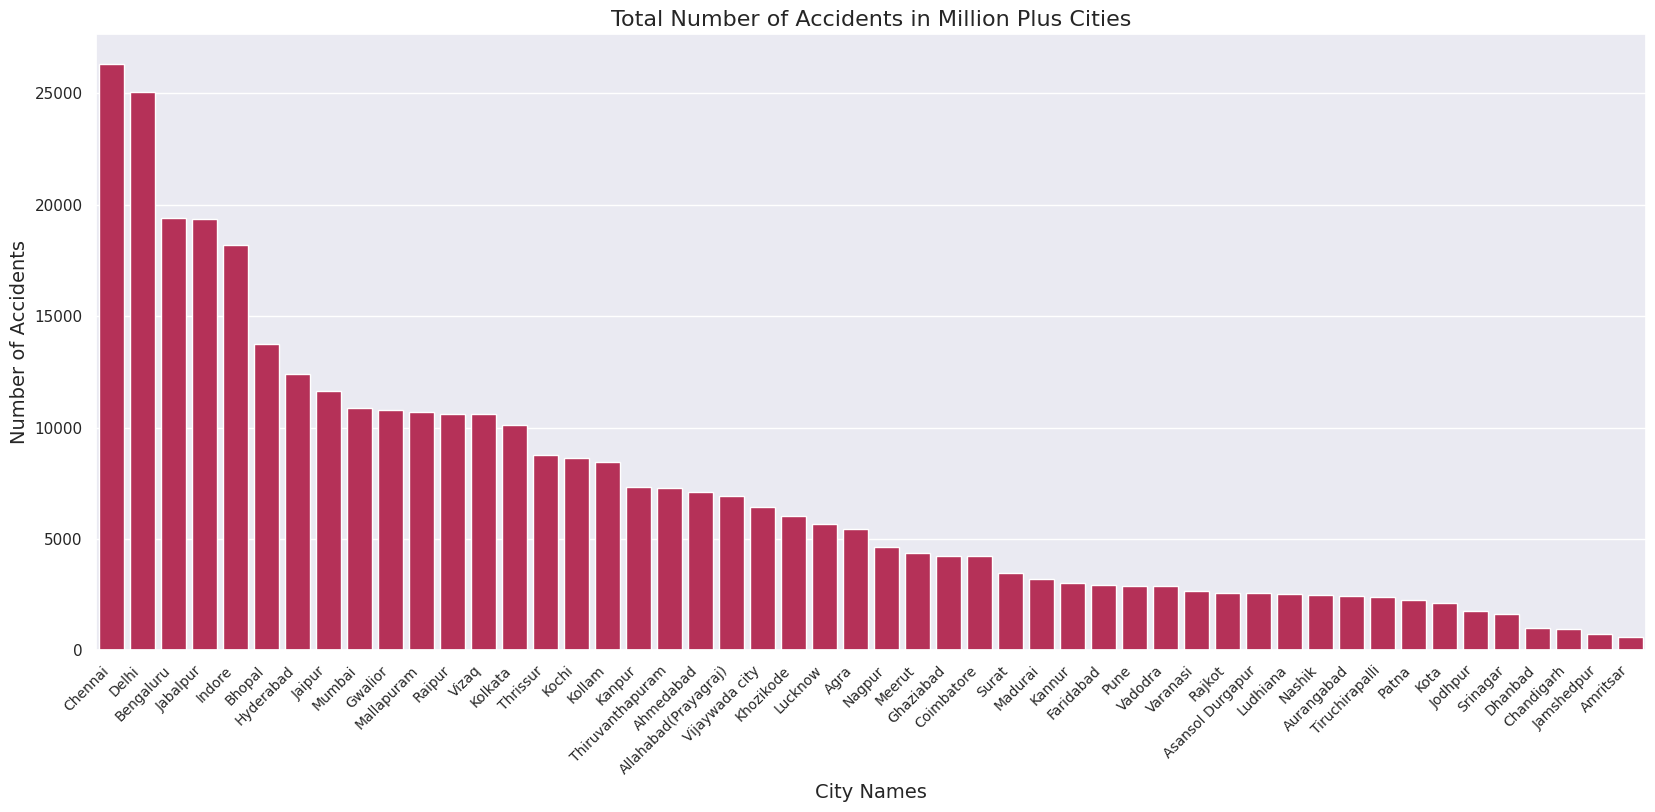

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x=accident_cities.index, y=accident_cities.values, palette='rocket',hue=Any,legend=False)

plt.title("Total Number of Accidents in Million Plus Cities", fontsize=16)
plt.xlabel("City Names", fontsize=14,)
plt.ylabel("Number of Accidents", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.show()

In [ ]:
#Study w.r.t. Cause Category and Subcategory
accident_labels = total_accidents_df['Cause category'].unique()
accident_labels

array(['Traffic Control', 'Junction', 'Traffic Violation',
       'Road Features', 'Impacting Vehicle/Object', 'Weather'],
      dtype=object)

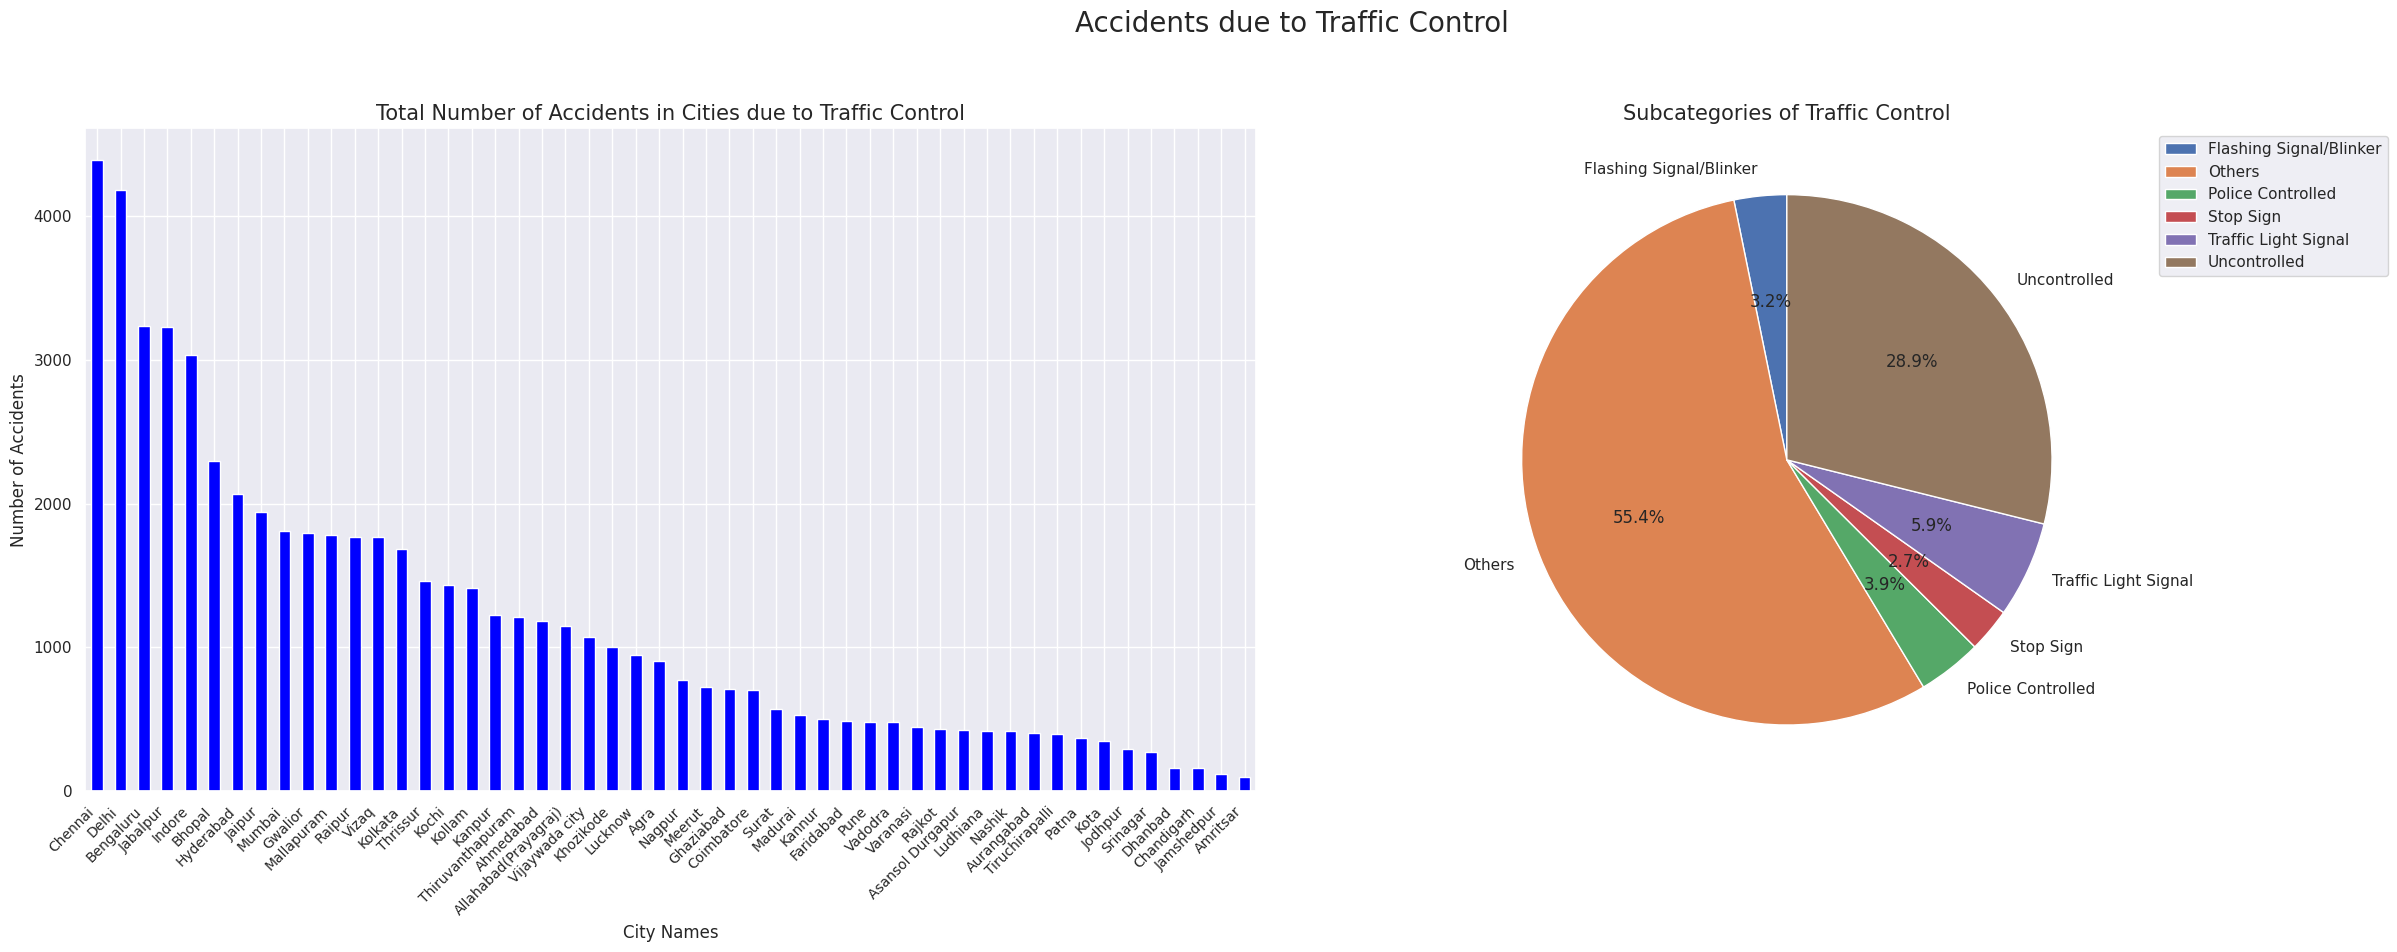

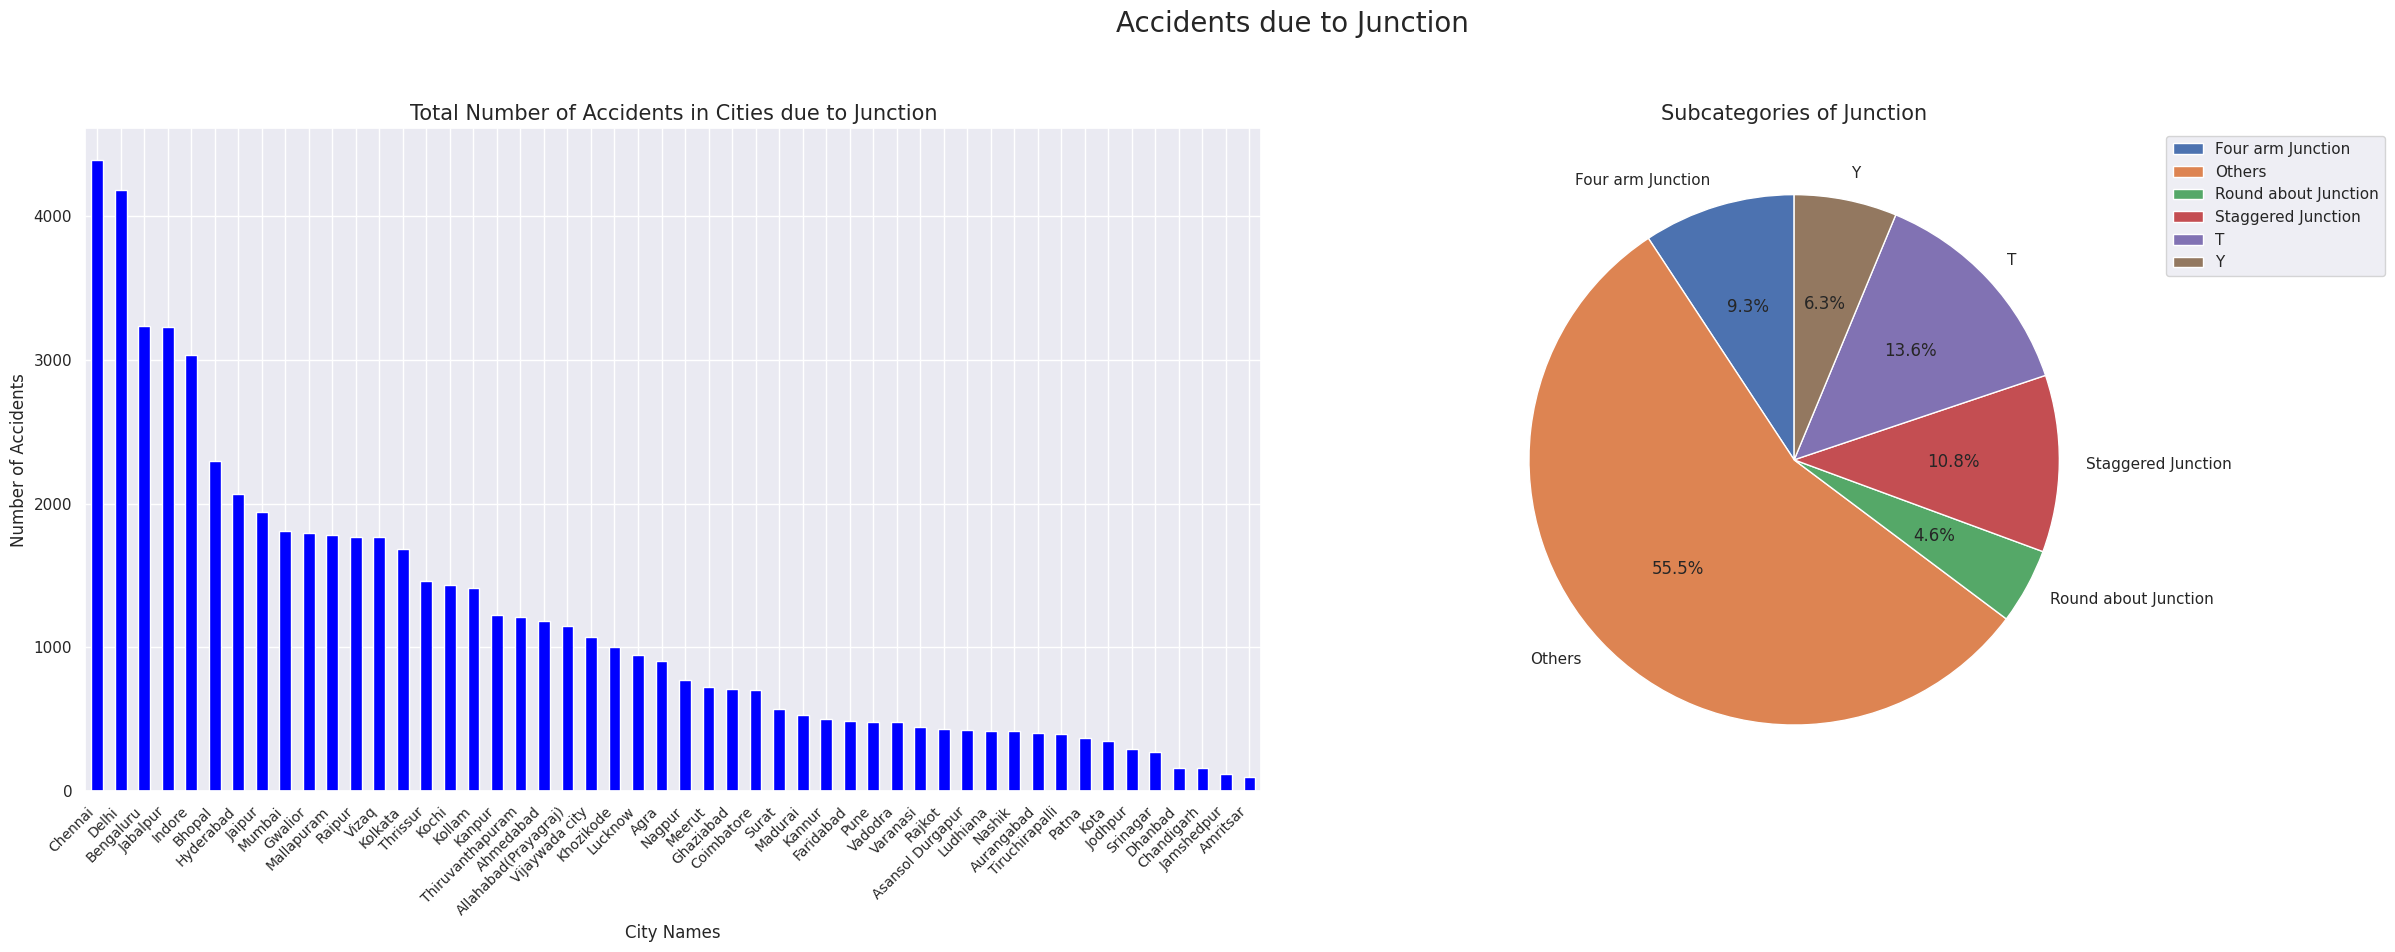

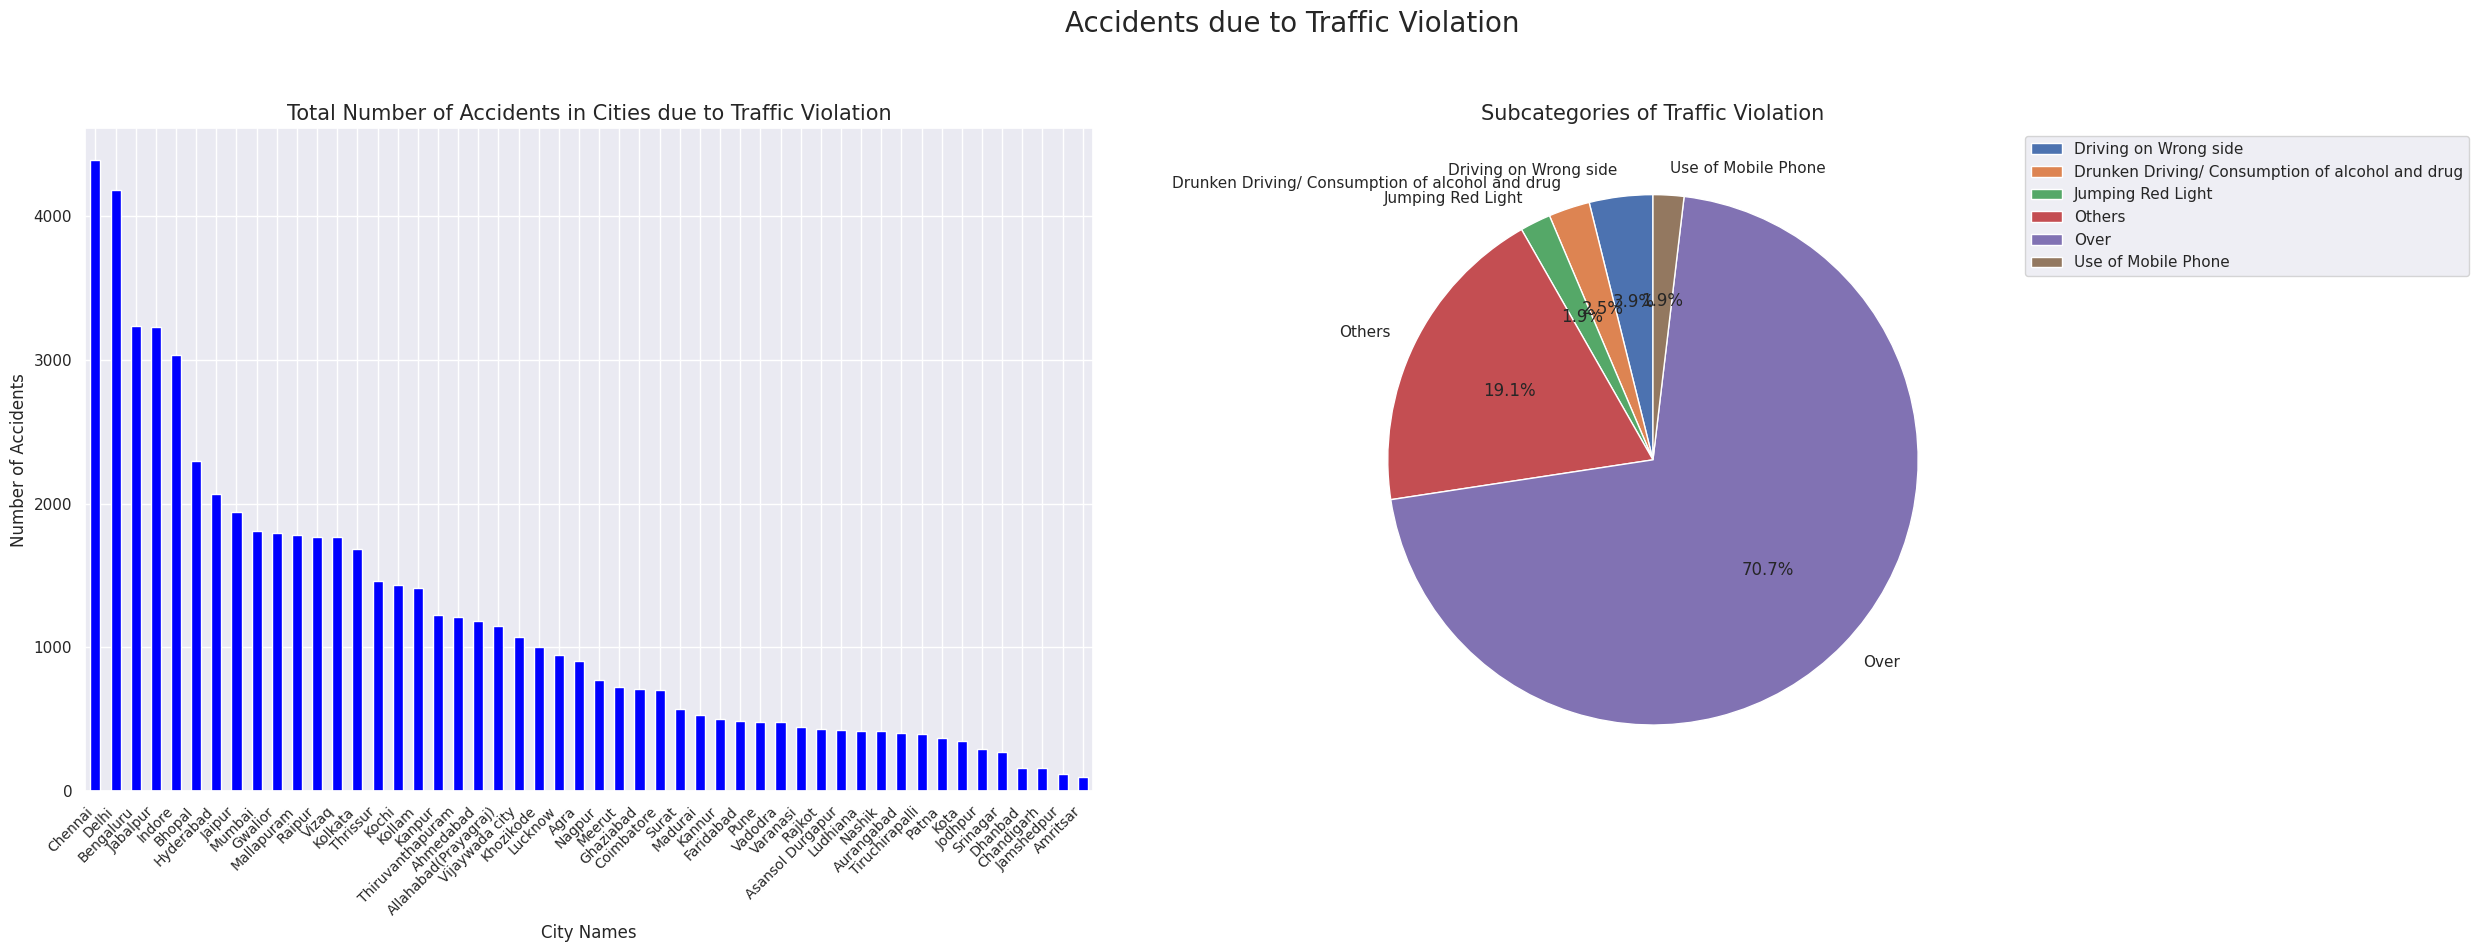

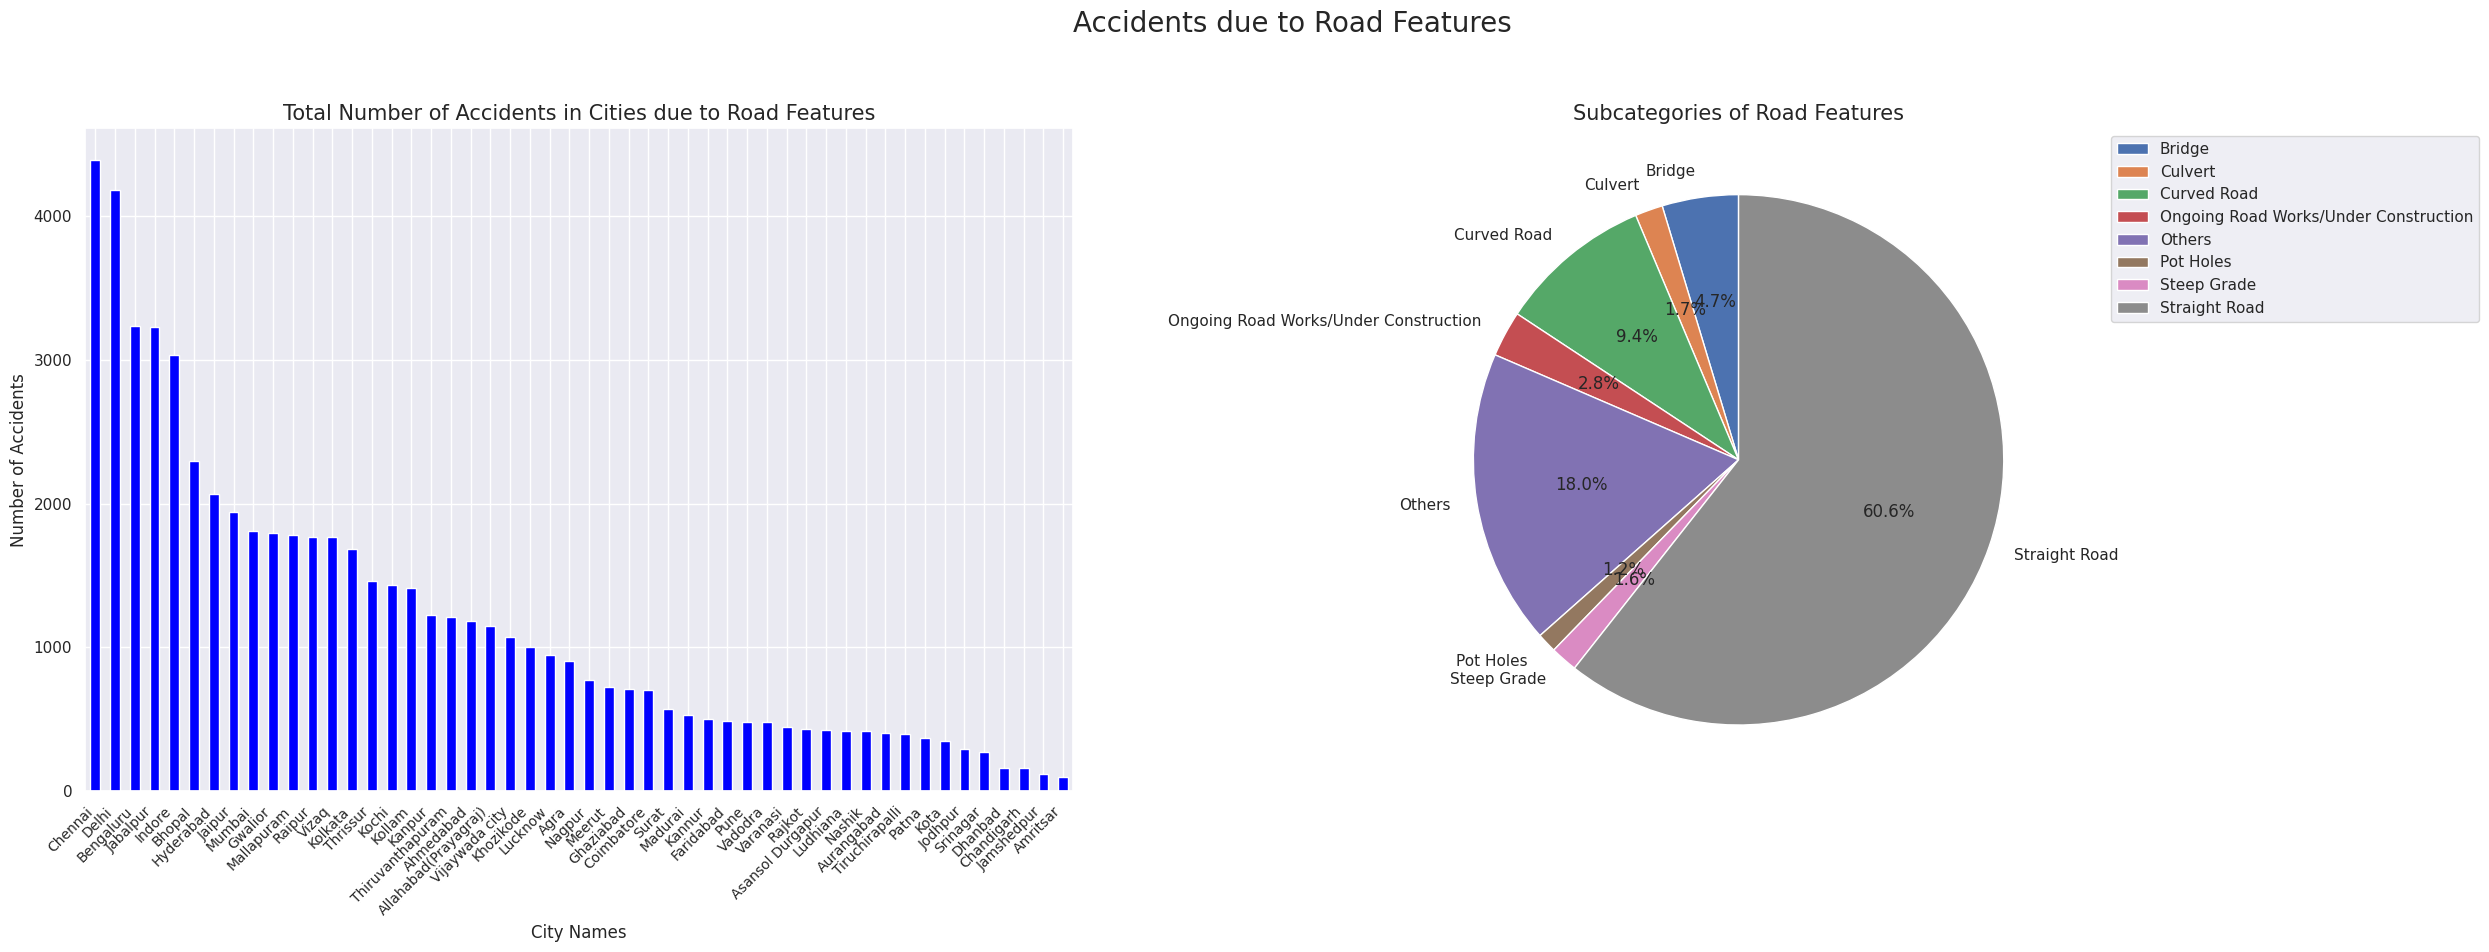

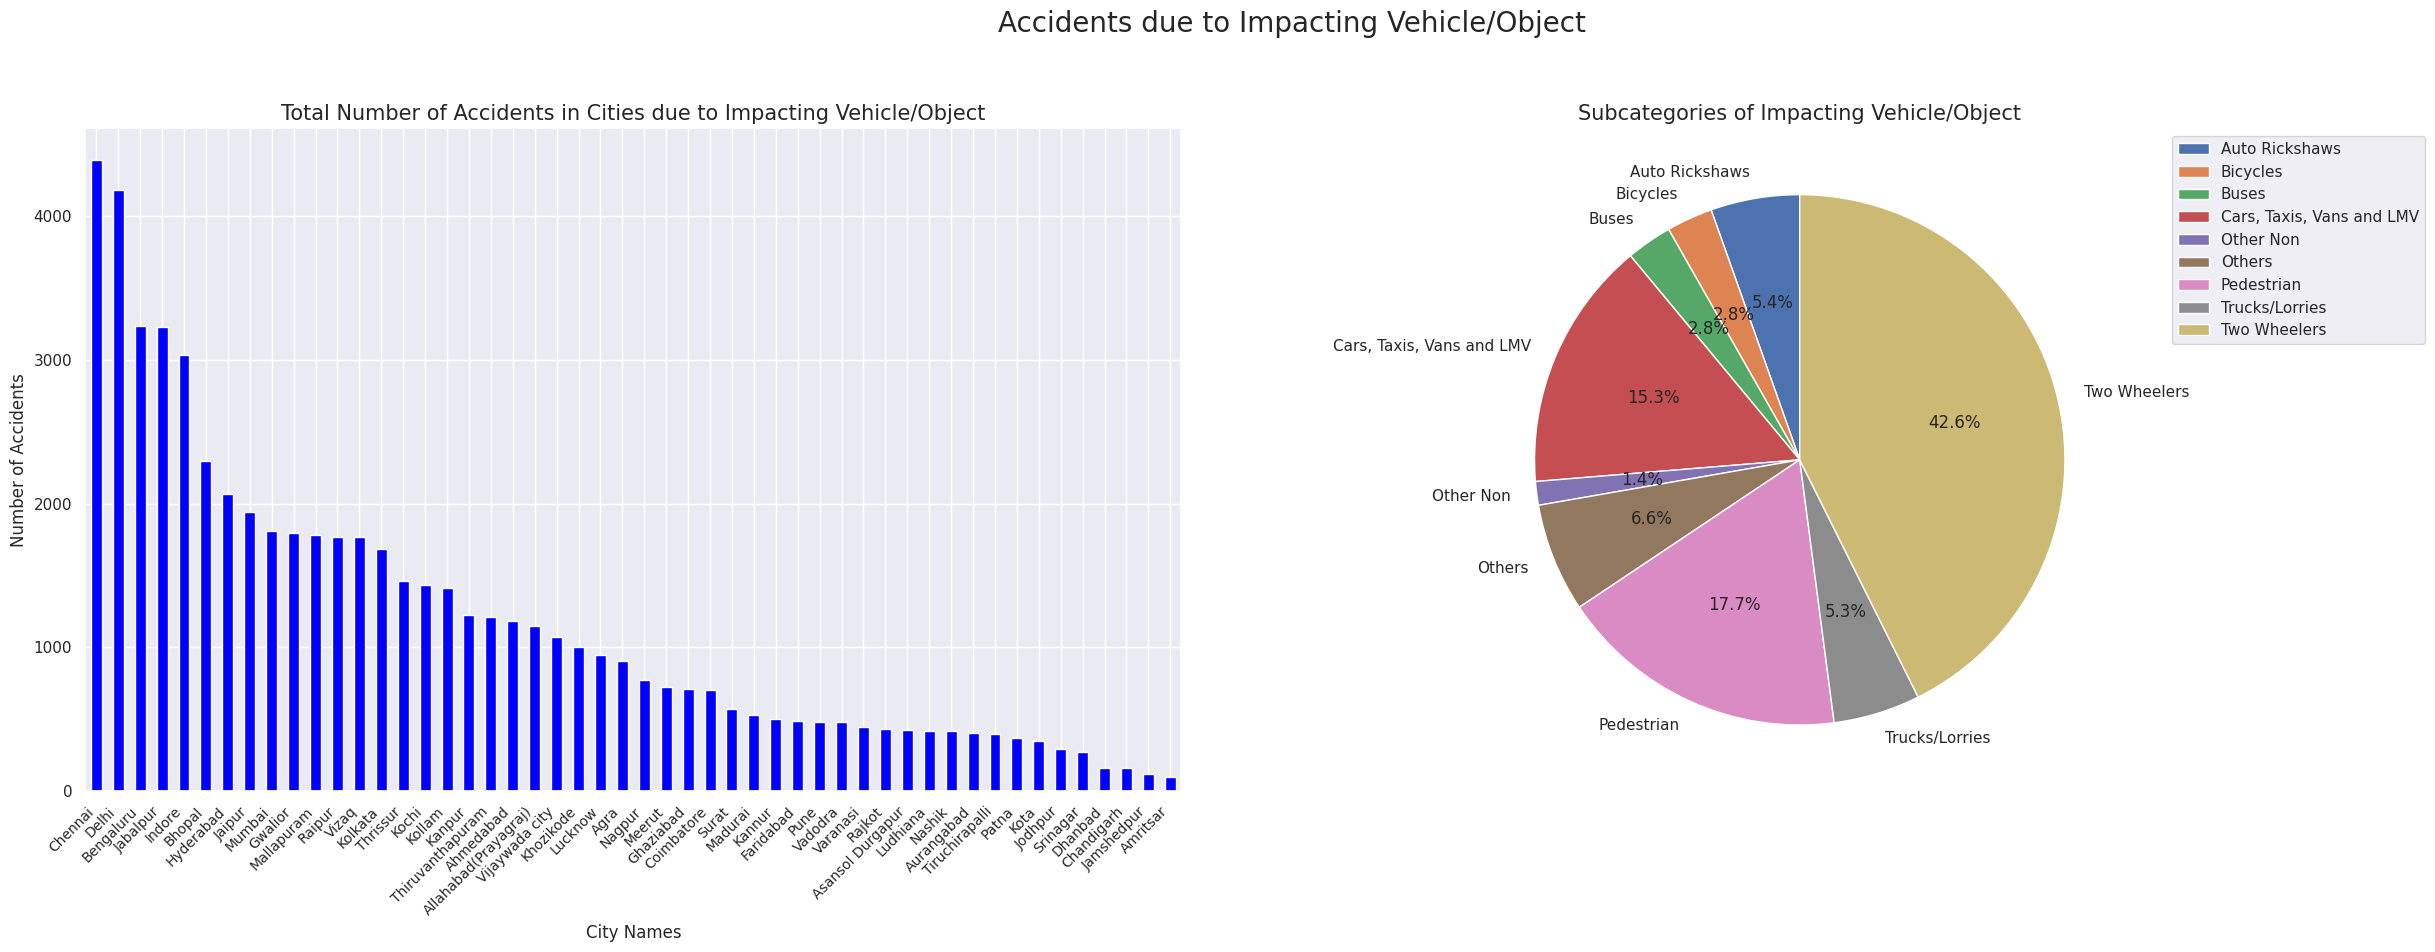

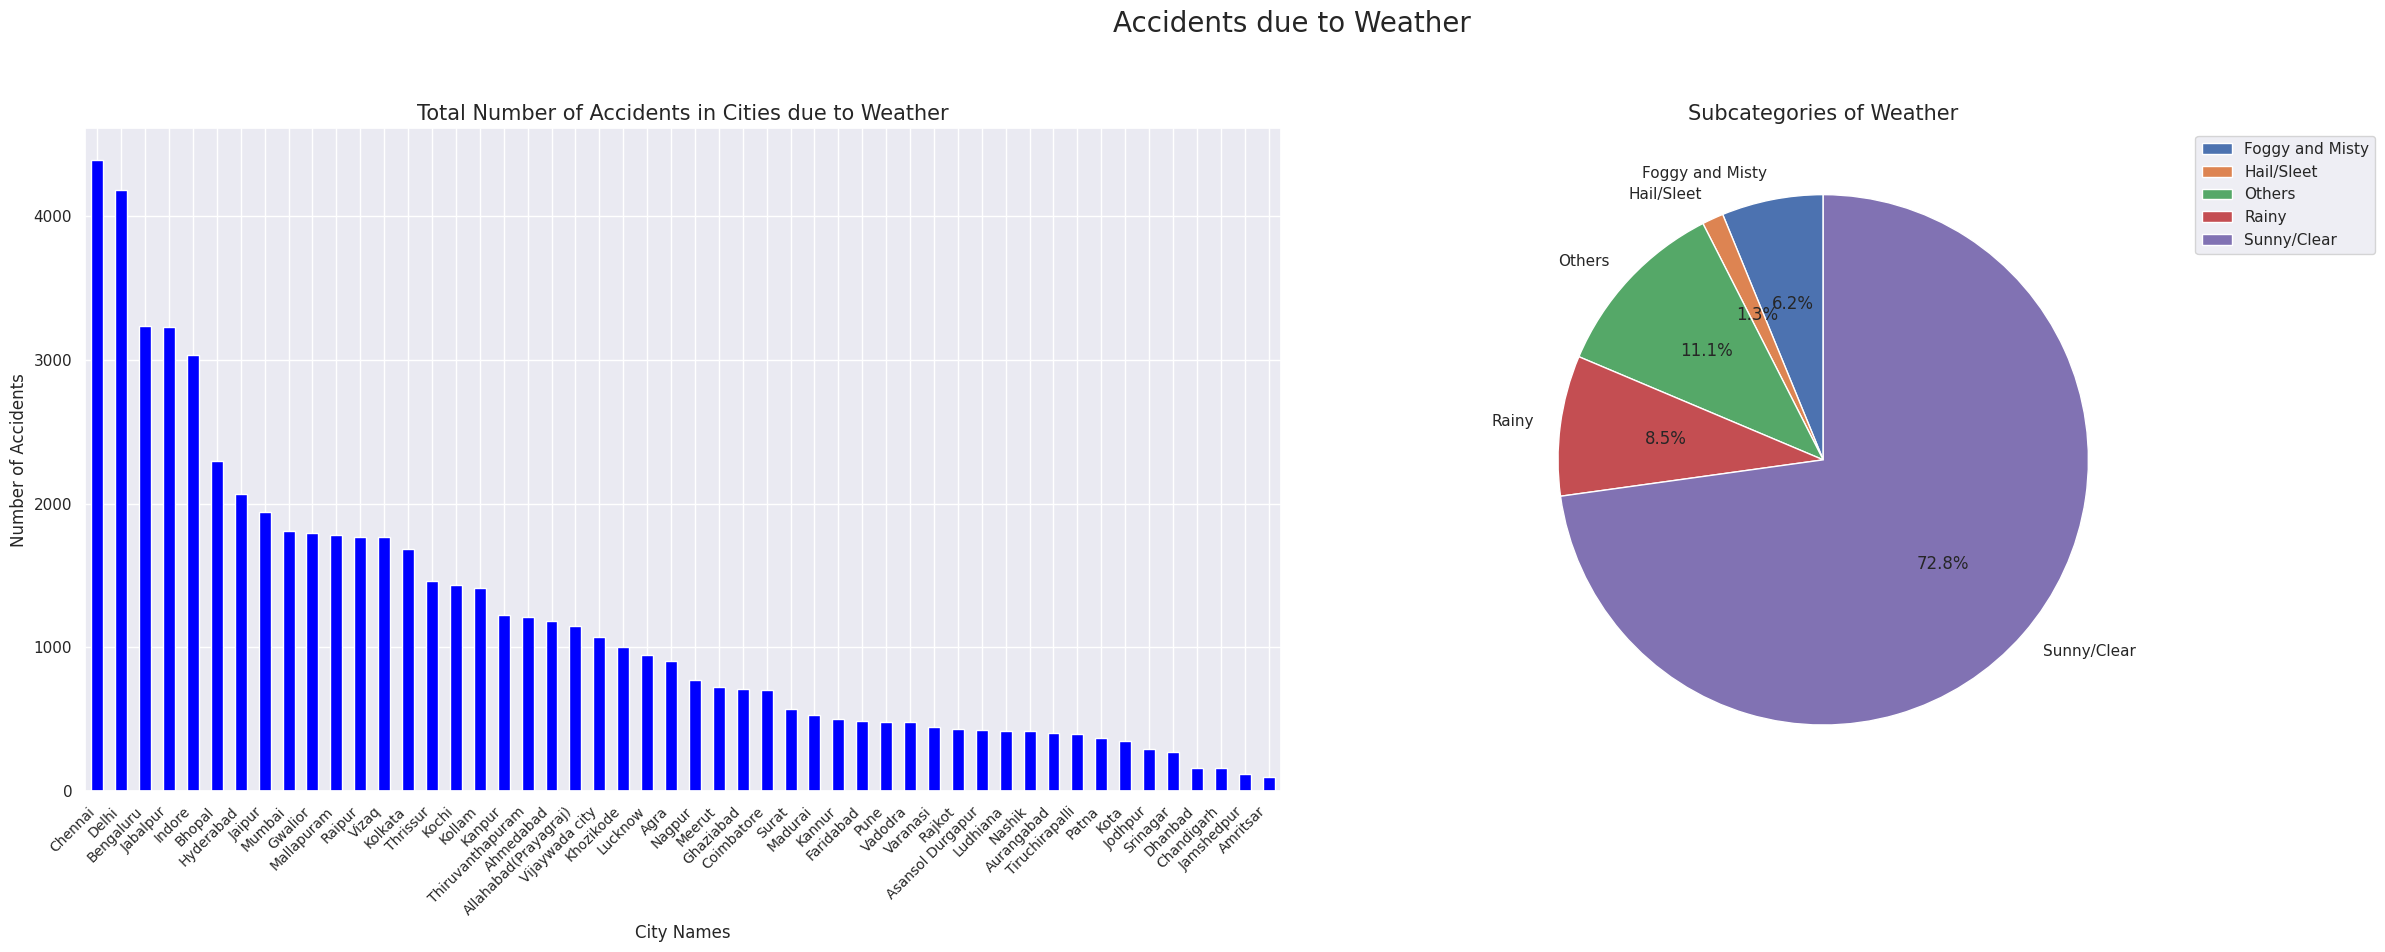

In [ ]:
for label in accident_labels:
    #Specific cause category of accident
    label_cat = total_accidents_df[total_accidents_df['Cause category']==label]

    #Grouping data by city for bar plot
    accidents_cat = label_cat.groupby('Million Plus Cities')['Count'].sum().sort_values(ascending=False)

    #Grouping data by sub-categories for pie chart
    labels_subcat = label_cat.groupby('Cause Subcategory')['Count'].sum()

    fig, axes = plt.subplots(1, 2, figsize=(26, 10))
    fig.suptitle(f"Accidents due to {label}", fontsize=20)

    #Barplot
    accidents_cat.plot(kind='bar', ax=axes[0], color='blue')
    axes[0].set_title(f"Total Number of Accidents in Cities due to {label}", fontsize=15)
    axes[0].set_xlabel("City Names")
    axes[0].set_ylabel("Number of Accidents")
    axes[0].tick_params(axis='x', rotation=45, labelsize=10)
    for tick in axes[0].get_xticklabels():
        tick.set_horizontalalignment('right')

    #Pie chart for subcategory
    labels_subcat.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90, legend=False)
    axes[1].set_title(f"Subcategories of {label}", fontsize=15)
    axes[1].set_ylabel("")

    axes[1].legend(bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for the suptitle
    plt.show()

In [ ]:
#Data Frame of cause sub-categories with top 4 cities
data = []
labels_subcat = total_accidents_df['Cause Subcategory'].unique()

for label in labels_subcat:
    labels_subcat_df = total_accidents_df[total_accidents_df['Cause Subcategory']==label]

    #top 4 cities
    top_4_cities = labels_subcat_df.groupby('Million Plus Cities')['Count'].sum().nlargest(4).index.tolist()

    data.append({
        'Cause Subcategory': label,
        'Top 4 Cities': ",".join(top_4_cities)
    })

accidents_cause_city_df = pd.DataFrame(data)
accidents_cause_city_df

Cause Subcategory  \
0                            Flashing Signal/Blinker   
1                                             Others   
2                                  Police Controlled   
3                                          Stop Sign   
4                               Traffic Light Signal   
5                                       Uncontrolled   
6                                  Four arm Junction   
7                               Round about Junction   
8                                 Staggered Junction   
9                                                  T   
10                                                 Y   
11                             Driving on Wrong side   
12  Drunken Driving/ Consumption of alcohol and drug   
13                                 Jumping Red Light   
14                                              Over   
15                               Use of Mobile Phone   
16                                            Bridge   
17                                           Culvert   
18                                       Curved Road   
19             Ongoing Road Works/Under Construction   
20                                         Pot Holes   
21                                       Steep Grade   
22                                     Straight Road   
23                                    Auto Rickshaws   
24                                          Bicycles   
25                                             Buses   
26                         Cars, Taxis, Vans and LMV   
27                                         Other Non   
28                                        Pedestrian   
29                                    Trucks/Lorries   
30                                      Two Wheelers   
31                                   Foggy and Misty   
32                                        Hail/Sleet   
33                                             Rainy   
34                                       Sunny/Clear   

                                    Top 4 Cities  
0      Chennai,Delhi,Allahabad(Prayagraj),Kollam  
1               Delhi,Jabalpur,Chennai,Bengaluru  
2                 Chennai,Kochi,Bengaluru,Kollam  
3      Bhopal,Chennai,Delhi,Allahabad(Prayagraj)  
4                  Chennai,Delhi,Bengaluru,Vizaq  
5               Mumbai,Hyderabad,Jabalpur,Indore  
6                 Indore,Chennai,Bengaluru,Delhi  
7                 Chennai,Hyderabad,Indore,Delhi  
8                Mumbai,Hyderabad,Chennai,Bhopal  
9                   Jabalpur,Indore,Delhi,Kollam  
10                Chennai,Indore,Jabalpur,Mumbai  
11    Delhi,Chennai,Allahabad(Prayagraj),Lucknow  
12   Chennai,Allahabad(Prayagraj),Jabalpur,Delhi  
13  Chennai,Delhi,Allahabad(Prayagraj),Hyderabad  
14             Indore,Bengaluru,Chennai,Jabalpur  
15   Chennai,Kanpur,Allahabad(Prayagraj),Lucknow  
16   Chennai,Delhi,Allahabad(Prayagraj),Ludhiana  
17   Chennai,Indore,Allahabad(Prayagraj),Lucknow  
18                  Chennai,Delhi,Gwalior,Raipur  
19   Kanpur,Chennai,Allahabad(Prayagraj),Gwalior  
20     Allahabad(Prayagraj),Chennai,Lucknow,Agra  
21   Chennai,Indore,Allahabad(Prayagraj),Gwalior  
22                 Bengaluru,Delhi,Indore,Mumbai  
23          Chennai,Jabalpur,Mallapuram,Thrissur  
24   Chennai,Delhi,Ludhiana,Allahabad(Prayagraj)  
25  Chennai,Gwalior,Allahabad(Prayagraj),Lucknow  
26            Mallapuram,Jabalpur,Chennai,Jaipur  
27      Kanpur,Chennai,Agra,Allahabad(Prayagraj)  
28                 Delhi,Mumbai,Indore,Bengaluru  
29                Kanpur,Jabalpur,Jaipur,Chennai  
30              Jabalpur,Bengaluru,Delhi,Chennai  
31               Chennai,Kanpur,Lucknow,Jabalpur  
32    Allahabad(Prayagraj),Rajkot,Lucknow,Kanpur  
33               Chennai,Raipur,Delhi,Mallapuram  
34               Bengaluru,Indore,Delhi,Jabalpur

In [ ]:
accident_labels = total_accidents_df['Cause category'].unique()
accident_labels

array(['Traffic Control', 'Junction', 'Traffic Violation',
       'Road Features', 'Impacting Vehicle/Object', 'Weather'],
      dtype=object)

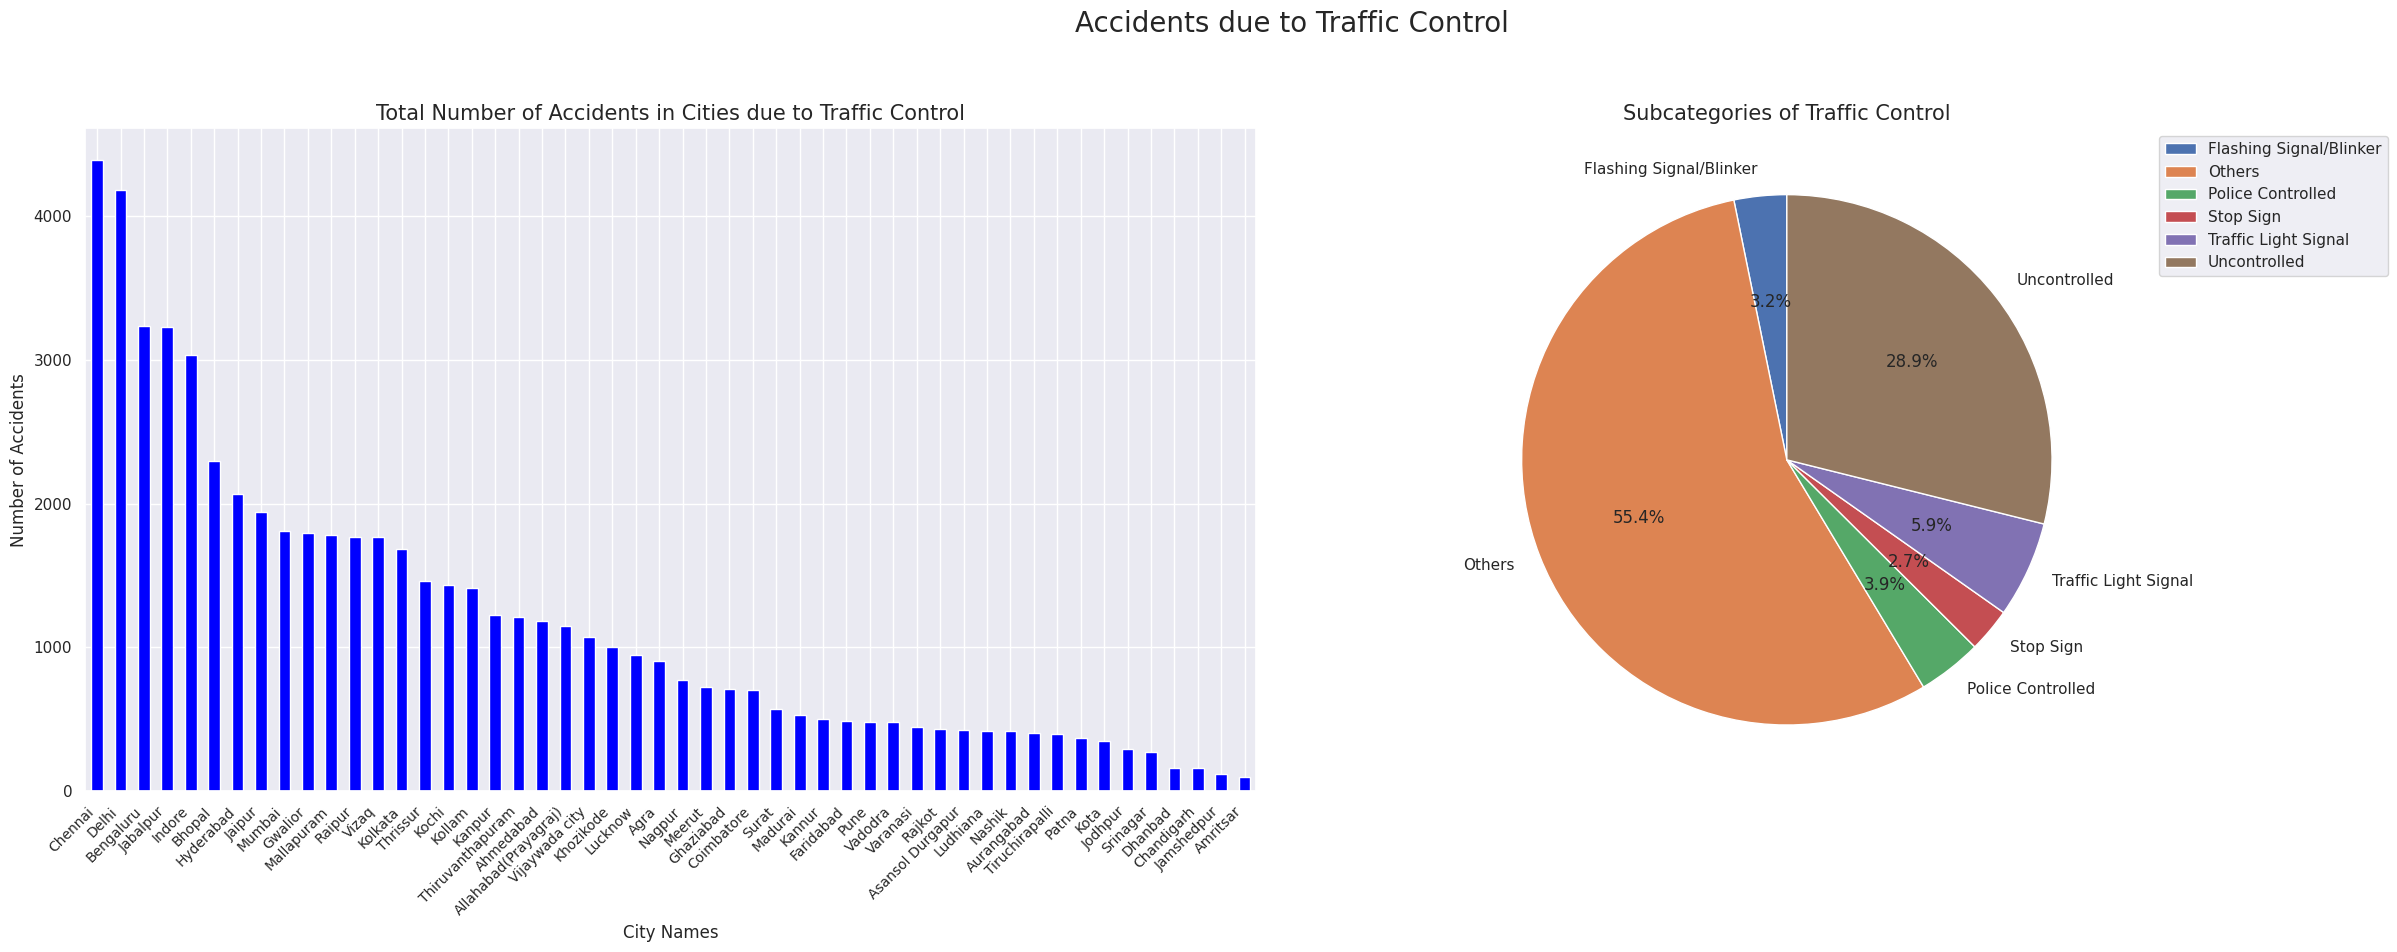

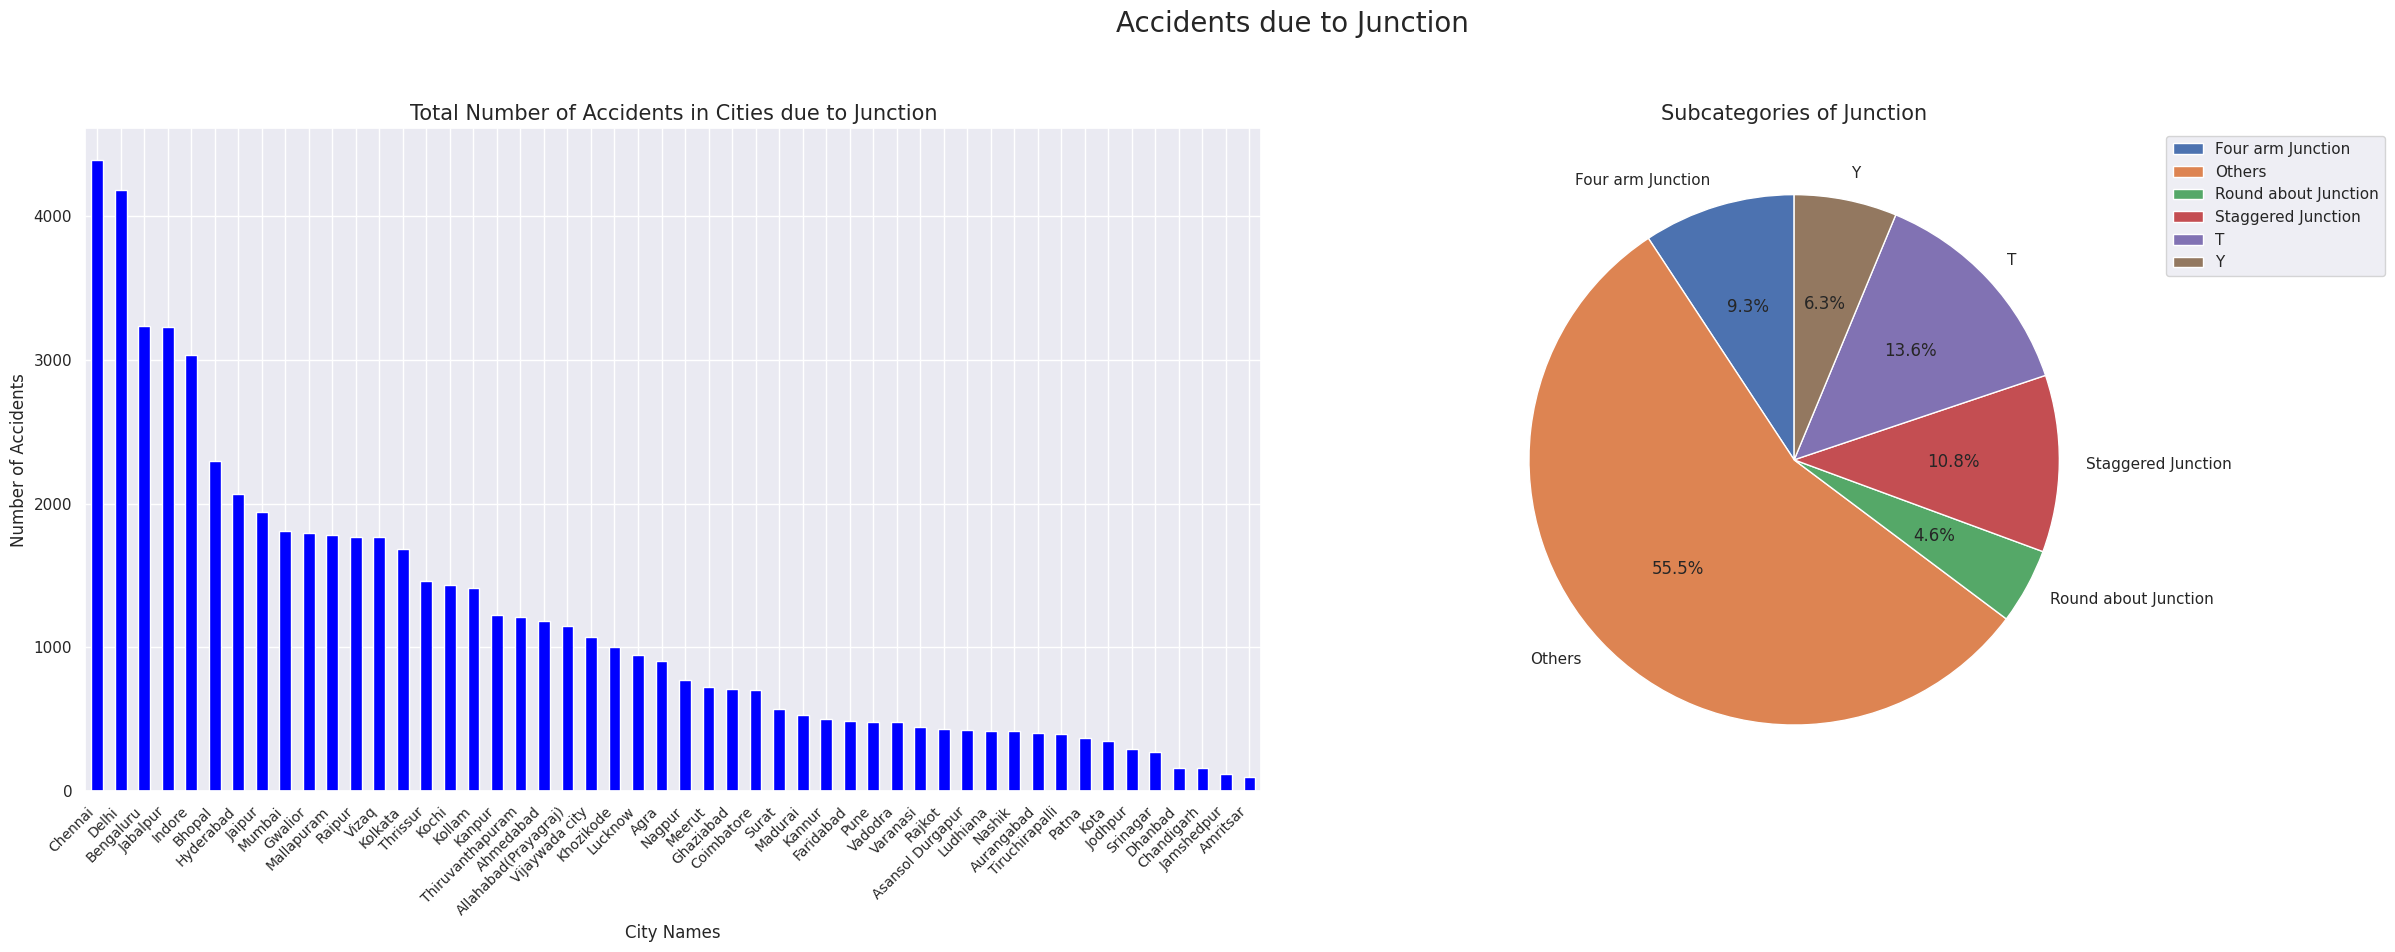

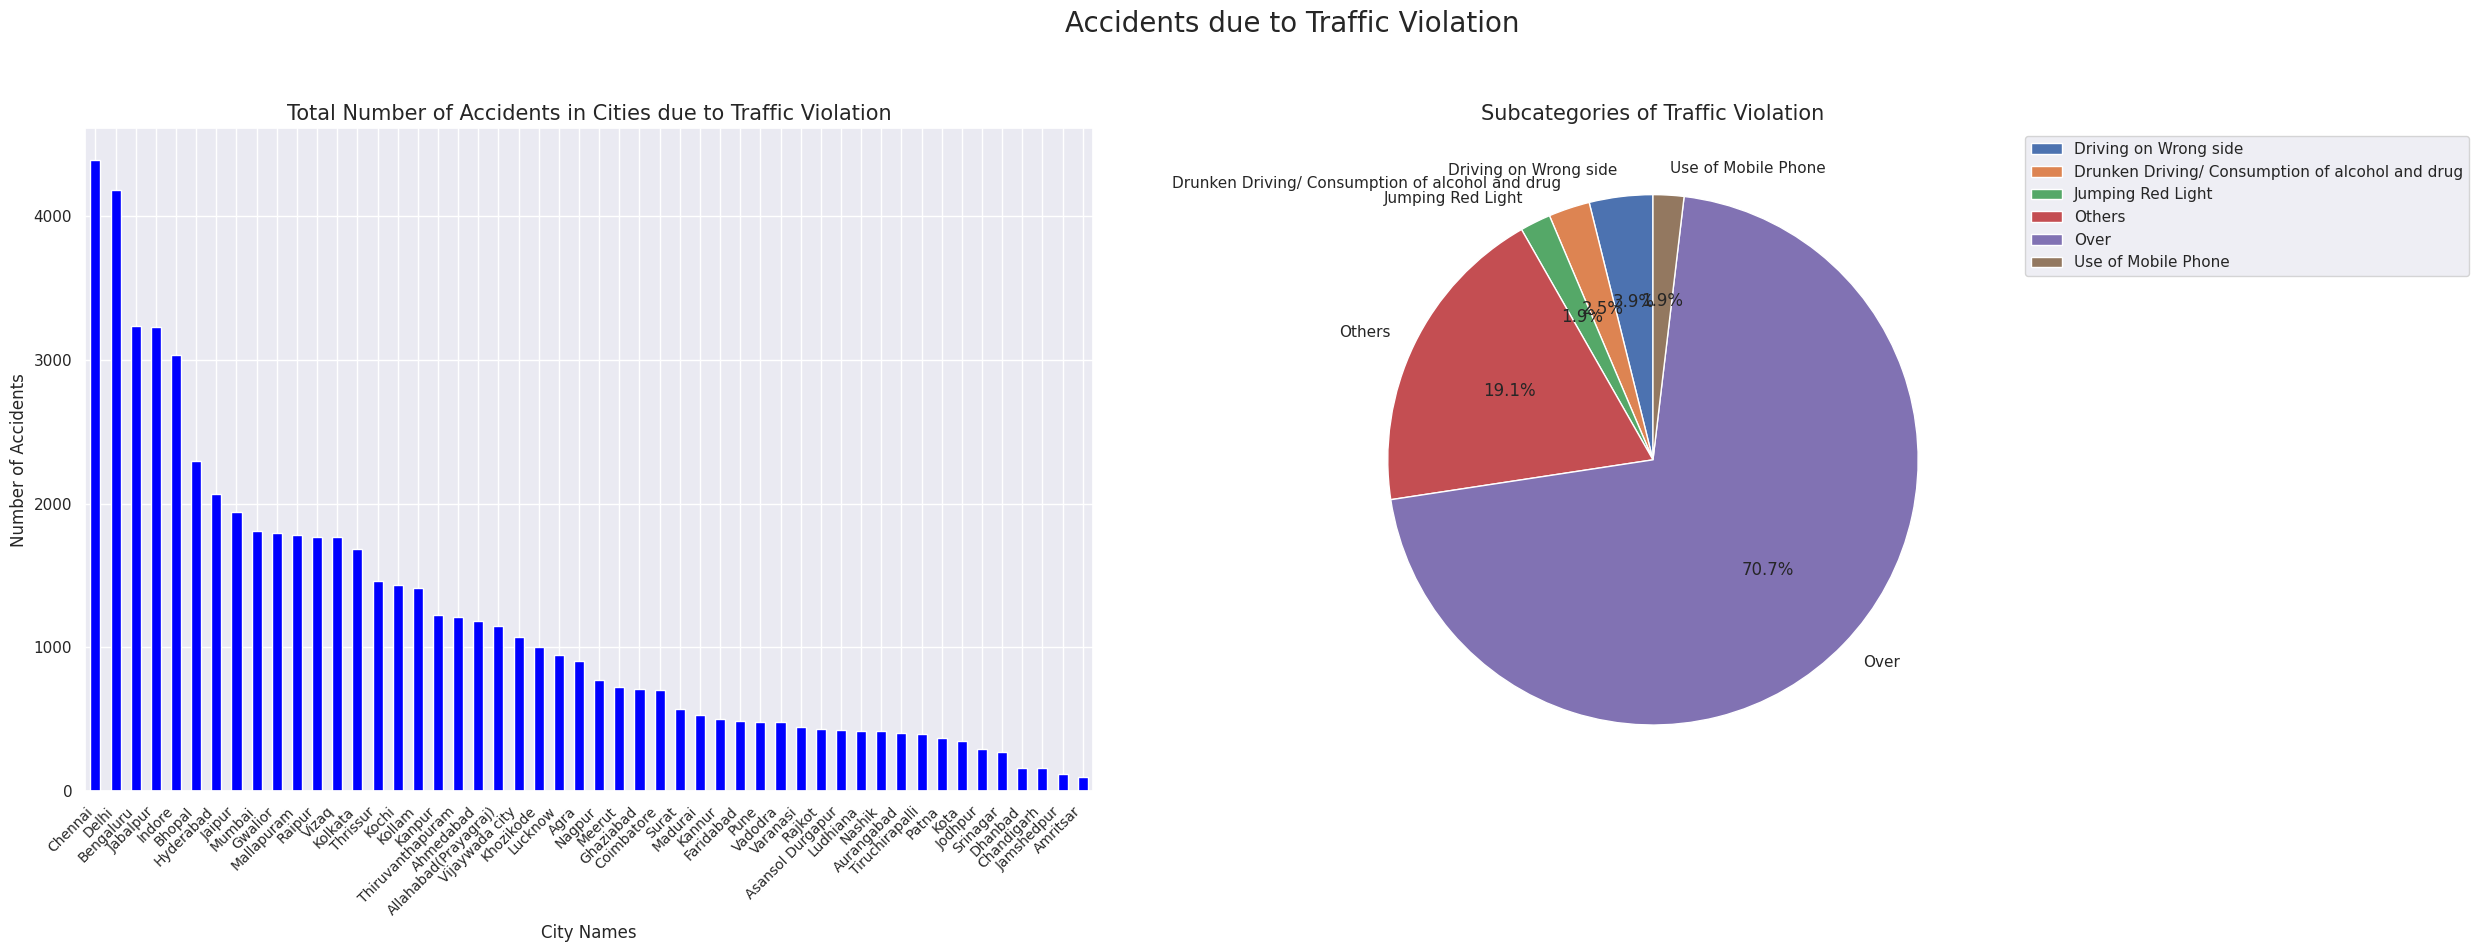

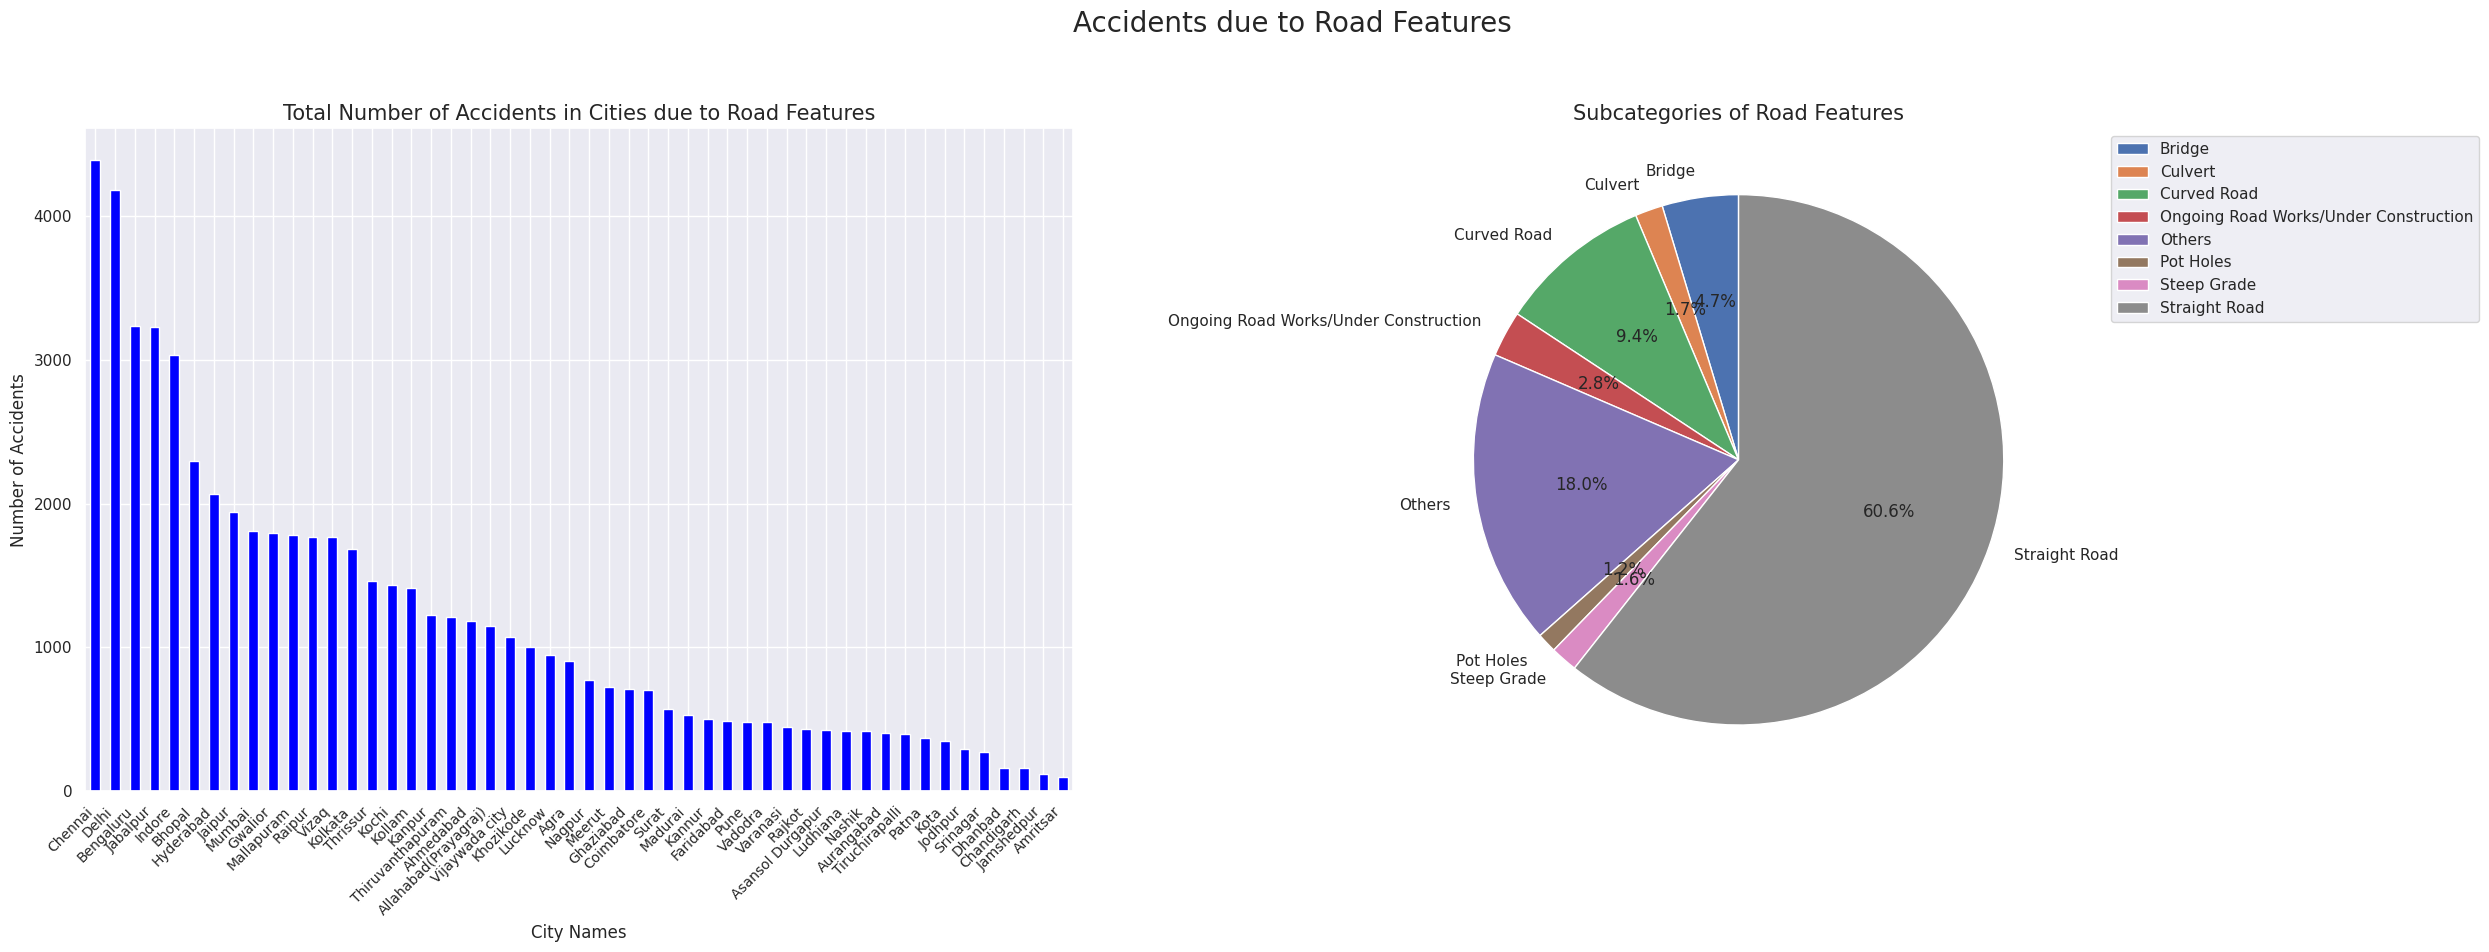

In [ ]:
for label in accident_labels:
    #Specific cause category of accident
    label_cat = total_accidents_df[total_accidents_df['Cause category']==label]

    #Grouping data by city for bar plot
    accidents_cat = label_cat.groupby('Million Plus Cities')['Count'].sum().sort_values(ascending=False)

    #Grouping data by sub-categories for pie chart
    labels_subcat = label_cat.groupby('Cause Subcategory')['Count'].sum()

    fig, axes = plt.subplots(1, 2, figsize=(26, 10))
    fig.suptitle(f"Accidents due to {label}", fontsize=20)

    #Barplot
    accidents_cat.plot(kind='bar', ax=axes[0], color='blue')
    axes[0].set_title(f"Total Number of Accidents in Cities due to {label}", fontsize=15)
    axes[0].set_xlabel("City Names")
    axes[0].set_ylabel("Number of Accidents")
    axes[0].tick_params(axis='x', rotation=45, labelsize=10)
    for tick in axes[0].get_xticklabels():
        tick.set_horizontalalignment('right')

    #Pie chart for subcategory
    labels_subcat.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90, legend=False)
    axes[1].set_title(f"Subcategories of {label}", fontsize=15)
    axes[1].set_ylabel("")

    axes[1].legend(bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for the suptitle
    plt.show()

In [ ]:
data = []
labels_subcat = total_accidents_df['Cause Subcategory'].unique()

for label in labels_subcat:
    labels_subcat_df = total_accidents_df[total_accidents_df['Cause Subcategory']==label]

    #top 4 cities
    top_4_cities = labels_subcat_df.groupby('Million Plus Cities')['Count'].sum().nlargest(4).index.tolist()

    data.append({
        'Cause Subcategory': label,
        'Top 4 Cities': ",".join(top_4_cities)
    })

accidents_cause_city_df = pd.DataFrame(data)
accidents_cause_city_df

In [ ]:
#Visualization of each Subcategory across different cities
num_subcategories = len(labels_subcat)
fig, axes = plt.subplots(num_subcategories, 1, figsize=(30, num_subcategories * 5))
fig.subplots_adjust(hspace=0.7)

for i, label in enumerate(labels_subcat):
    labels_subcat_df = total_accidents_df[total_accidents_df['Cause Subcategory']==label]
    subcat_accidents = labels_subcat_df.groupby('Million Plus Cities')['Count'].sum().sort_values(ascending=False)
    subcat_accidents.plot(
        kind='bar',
        ax=axes[i] if num_subcategories > 1 else axes,
        color='blue'
    )
    axes[i].set_title(f"City-wise distribution of Total number of accidents due to {label}")

In [ ]:
#Analysis: Total Injured
total_injured_df = df_IND[df_IND['Outcome of Incident']=='Total Injured']
total_injured_df

In [ ]:
#Distribution of Total Injured across Cities
5+9
injured_cities = total_injured_df.groupby('Million Plus Cities')['Count'].sum().sort_values(ascending=False)
#Plotting Barplot
plt.figure(figsize=(20,8))
sns.barplot(x=injured_cities.index, y=injured_cities.values, palette='rocket')

plt.title("Total Injured in Million Plus Cities", fontsize=16)
plt.xlabel("City Names", fontsize=14)
plt.ylabel("Number of Injured", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.show()


In [ ]:
#Study w.r.t. Cause Category and Cause Subcategory
injured_labels = total_injured_df['Cause category'].unique()
injured_labels

In [ ]:
for label in injured_labels:
    label_cat = total_injured_df[total_injured_df['Cause category']==label]

    #Grouping data by city for bar plot
    injured_cat = label_cat.groupby('Million Plus Cities')['Count'].sum().sort_values(ascending=False)

    #Grouping data by sub-categories for pie chart
    labels_subcat = label_cat.groupby('Cause Subcategory')['Count'].sum()

    fig, axes = plt.subplots(1, 2, figsize=(26, 10))
    fig.suptitle(f"Injuries due to {label}", fontsize=20)

    #Barplot
    accidents_cat.plot(kind='bar', ax=axes[0], color='blue')
    axes[0].set_title(f"Total Injuries in Cities due to {label}", fontsize=15)
    axes[0].set_xlabel("City Names")
    axes[0].set_ylabel("Number of Injuries")
    axes[0].tick_params(axis='x', rotation=45, labelsize=10)
    for tick in axes[0].get_xticklabels():
        tick.set_horizontalalignment('right')

    #Pie chart for subcategory
    labels_subcat.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90, legend=False)
    axes[1].set_title(f"Subcategories of {label}", fontsize=15)
    axes[1].set_ylabel("")

    axes[1].legend(bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
#Data Frame of Cause Sub-Categories with top 4 Cities
data = []
labels_subcat = total_injured_df['Cause Subcategory'].unique()

for label in labels_subcat:
    labels_subcat_df = total_injured_df[total_injured_df['Cause Subcategory']==label]

    #top 4 cities
    top_4_cities = labels_subcat_df.groupby('Million Plus Cities')['Count'].sum().nlargest(4).index.tolist()

    data.append({
        'Cause Subcategory': label,
        'Top 4 Cities': ",".join(top_4_cities)
    })

injuries_cause_city_df = pd.DataFrame(data)
injuries_cause_city_df

In [ ]:
#Visualization of each Subcategory across different Cities
num_subcategories = len(labels_subcat)
fig, axes = plt.subplots(num_subcategories, 1, figsize=(30, num_subcategories * 5))
fig.subplots_adjust(hspace=0.7)

for i, label in enumerate(labels_subcat):
    labels_subcat_df = total_injured_df[total_injured_df['Cause Subcategory']==label]
    subcat_injured = labels_subcat_df.groupby('Million Plus Cities')['Count'].sum().sort_values(ascending=False)
    subcat_injured.plot(
        kind='bar',
        ax=axes[i] if num_subcategories > 1 else axes,
        color='blue'
    )
    axes[i].set_title(f"City-wise distribution of Total Injuries due to {label}")

In [ ]:
#Analysis: Persons Killed
total_killed_df = df_IND[df_IND['Outcome of Incident']=='Persons Killed']
total_killed_df

In [ ]:
# Calculate total persons killed for each city and assign it to 'killed_cities'
killed_cities = total_killed_df.groupby('Million Plus Cities')['Count'].sum().sort_values(ascending=False)


#Plotting Barplot
plt.figure(figsize=(20,8))
sns.barplot(x=killed_cities.index, y=killed_cities.values, palette='rocket',hue=Any)

plt.title("Total Persons Killed in Million Plus Cities", fontsize=16)
plt.xlabel("City Names", fontsize=14)
plt.ylabel("Number of People Killed", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.show()

In [ ]:
#Study w.r.t. Cause category and Subcategory
killed_labels = total_killed_df['Cause category'].unique()
killed_labels

In [ ]:
for label in killed_labels:
    label_cat = total_killed_df[total_killed_df['Cause category']==label]

    #Grouping data by city for bar plot
    killed_cat = label_cat.groupby('Million Plus Cities')['Count'].sum().sort_values(ascending=False)

    #Grouping data by sub-categories for pie chart
    labels_subcat = label_cat.groupby('Cause Subcategory')['Count'].sum()

    fig, axes = plt.subplots(1, 2, figsize=(26, 10))
    fig.suptitle(f"Persons Killed due to {label}", fontsize=20)

    #Barplot
    killed_cat.plot(kind='bar', ax=axes[0], color='blue')
    axes[0].set_title(f"Total Persons Killed in Cities due to {label}", fontsize=15)
    axes[0].set_xlabel("City Names")
    axes[0].set_ylabel("Number of Persons Killed")
    axes[0].tick_params(axis='x', rotation=45, labelsize=10)
    for tick in axes[0].get_xticklabels():
        tick.set_horizontalalignment('right')

    #Pie chart for subcategory
    labels_subcat.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90, legend=False)
    axes[1].set_title(f"Subcategories of {label}", fontsize=15)
    axes[1].set_ylabel("")

    axes[1].legend(bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
#Data frame of Cause Sub-categories with top 4 cities
data = []
labels_subcat = total_killed_df['Cause Subcategory'].unique()

for label in labels_subcat:
    labels_subcat_df = total_killed_df[total_killed_df['Cause Subcategory']==label]

    #top 4 cities
    top_4_cities = labels_subcat_df.groupby('Million Plus Cities')['Count'].sum().nlargest(4).index.tolist()

    data.append({
        'Cause Subcategory': label,
        'Top 4 Cities': ",".join(top_4_cities)
    })

killed_cause_city_df = pd.DataFrame(data)
killed_cause_city_df

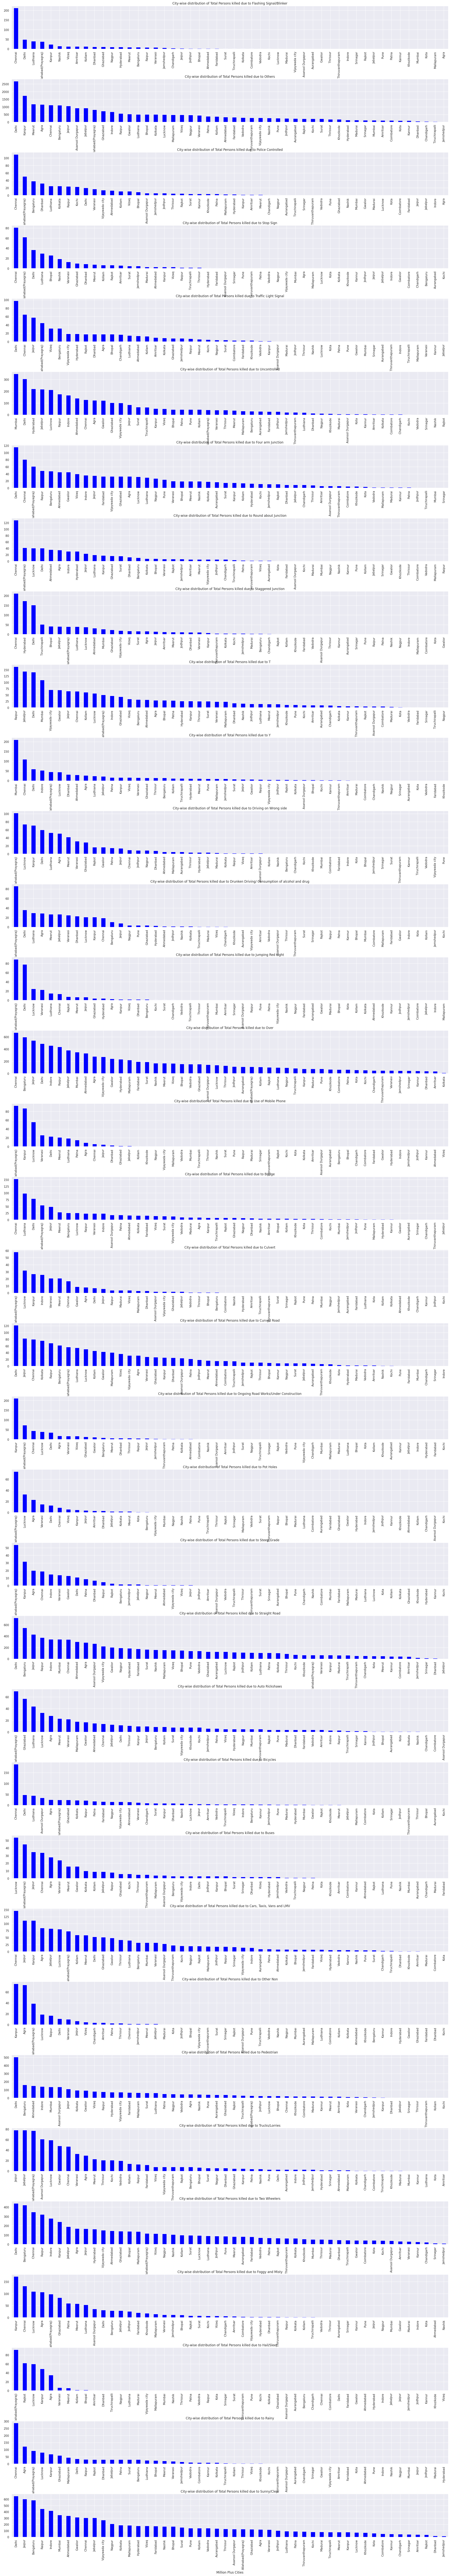

In [ ]:
#Visualization of Subcategories across different cities
total_killed_df = df_IND[df_IND['Outcome of Incident']=='Persons Killed']
labels_subcat = total_killed_df['Cause Subcategory'].unique()


num_subcategories = len(labels_subcat)
fig, axes = plt.subplots(num_subcategories, 1, figsize=(30, num_subcategories * 5))
fig.subplots_adjust(hspace=0.7)

for i, label in enumerate(labels_subcat):
    labels_subcat_df = total_killed_df[total_killed_df['Cause Subcategory']==label]
    subcat_killed = labels_subcat_df.groupby('Million Plus Cities')['Count'].sum().sort_values(ascending=False)
    subcat_killed.plot(
        kind='bar',
        ax=axes[i] if num_subcategories > 1 else axes,
        color='blue'
    )
    axes[i].set_title(f"City-wise distribution of Total Persons killed due to {label}")